<h1> Proyecto IA </h1>


<h1>Importación de Bibliotecas</h1>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt



<h1>Carga del Conjunto de Datos</h1>

In [2]:
#paso 1

# Cargar el archivo con el nombre indicado
bd_inundacion = pd.read_csv("inundaciones lluvias.csv")

In [3]:
# Mostrar las primeras filas del dataset
print("Primeras filas del dataset:")
print(bd_inundacion.head())

Primeras filas del dataset:
   id_estacion registro_fecha departamento municipio      evento intensidad  \
0        80144     20/11/1998        Chocó    Quibdó  inundacion   moderada   
1        80144     27/03/1999        Chocó    Quibdó  inundacion       leve   
2        80144     06/11/1999        Chocó    Quibdó  inundacion     severa   
3        80144     08/05/2000        Chocó    Quibdó  inundacion     severa   
4        80144     04/12/2000        Chocó    Quibdó  inundacion   moderada   

  zona_hidrografica altura_agua    caudal duracion_lluvia     clima  \
0            Atrato        Alto  Moderado             10h  lluvioso   
1            Atrato       Medio      Bajo              8h  lluvioso   
2            Atrato    Muy Alto      Alto             24h  lluvioso   
3            Atrato     Crítico      Alto             36h  lluvioso   
4            Atrato        Alto  Moderado             10h  lluvioso   

   estado_climatico    nubosidad  indice_humedad  longitud  latitud  \

In [4]:
# Mostrar el número de filas y columnas
print("\nDimensiones del archivo:")
print(bd_inundacion.shape)


Dimensiones del archivo:
(191, 19)


In [5]:
# Mostrar nombres de columnas actuales
print("\nNombres de columnas:")
print(bd_inundacion.columns.tolist())


Nombres de columnas:
['id_estacion', 'registro_fecha', 'departamento', 'municipio', 'evento', 'intensidad', 'zona_hidrografica', 'altura_agua', 'caudal', 'duracion_lluvia', 'clima', 'estado_climatico', 'nubosidad', 'indice_humedad', 'longitud', 'latitud', 'precipitacion_mm', 'temperatura_C', 'unidad_media_C']


<h1>Definición de una Función para Limpiar Nombres de Columnas</h1>

In [6]:
#paso 2
# Diccionario para reemplazar tildes manualmente
acentos = {
    'á': 'a', 'é': 'e', 'í': 'i',
    'ó': 'o', 'ú': 'u', 'ñ': 'n'
}

def limpiar_columna(col):
    col = col.lower().replace(" ", "_")
    for acento, sin_acento in acentos.items():
        col = col.replace(acento, sin_acento)
    return col

In [7]:
# Aplicar la función a cada columna
bd_inundacion.columns = [limpiar_columna(col) for col in bd_inundacion.columns]


In [8]:
# Verificamos los nuevos nombres de columnas
print("Nuevos nombres de columnas:")
print(bd_inundacion.columns.tolist())

Nuevos nombres de columnas:
['id_estacion', 'registro_fecha', 'departamento', 'municipio', 'evento', 'intensidad', 'zona_hidrografica', 'altura_agua', 'caudal', 'duracion_lluvia', 'clima', 'estado_climatico', 'nubosidad', 'indice_humedad', 'longitud', 'latitud', 'precipitacion_mm', 'temperatura_c', 'unidad_media_c']


<h1>Conversión de la Columna de Fecha a Formato Datetime</h1>

In [9]:
#paso 3
# 1. Convertir columna 'registro_fecha' a formato datetime
bd_inundacion['registro_fecha'] = pd.to_datetime(bd_inundacion['registro_fecha'], dayfirst=True)

In [10]:
# 2. Limpiar el texto de la columna 'intensidad': quitar comillas y espacios
bd_inundacion['intensidad'] = bd_inundacion['intensidad'].str.replace('"', '').str.strip().str.lower()

In [11]:
# Verificamos nuevamente los cambios aplicados
print("Tipos de datos actualizados:")
print(bd_inundacion.dtypes)

Tipos de datos actualizados:
id_estacion                   int64
registro_fecha       datetime64[ns]
departamento                 object
municipio                    object
evento                       object
intensidad                   object
zona_hidrografica            object
altura_agua                  object
caudal                       object
duracion_lluvia              object
clima                        object
estado_climatico              int64
nubosidad                    object
indice_humedad              float64
longitud                    float64
latitud                     float64
precipitacion_mm              int64
temperatura_c               float64
unidad_media_c               object
dtype: object


In [12]:
print("\nValores únicos en 'intensidad':")
print(bd_inundacion['intensidad'].unique())


Valores únicos en 'intensidad':
['moderada' 'leve' 'severa']


<h1>Filtrado de Eventos Críticos de Inundación</h1>

In [13]:
#paso 4

# Filtrar datos con intensidad severa, año >= 2010 y precipitación > 100 mm
filtro_critico = bd_inundacion[
    (bd_inundacion['intensidad'] == 'severa') &
    (pd.to_datetime(bd_inundacion['registro_fecha']).dt.year >= 2010) &
    (bd_inundacion['precipitacion_mm'] > 100)
]

In [14]:
# Mostrar las primeras filas del filtro aplicado
print("Eventos críticos filtrados:")
print(filtro_critico.head())

Eventos críticos filtrados:
    id_estacion registro_fecha departamento municipio      evento intensidad  \
38        80144     2010-11-03        Chocó    Quibdó  inundacion     severa   
43        80144     2011-06-24        Chocó    Quibdó  inundacion     severa   
44        80144     2011-09-01        Chocó    Quibdó  inundacion     severa   
48        80144     2012-07-29        Chocó    Quibdó  inundacion     severa   
55        80144     2015-09-10        Chocó    Quibdó  inundacion     severa   

   zona_hidrografica altura_agua caudal duracion_lluvia               clima  \
38            Atrato    Muy Alto   Alto             24h            lluvioso   
43            Atrato    Muy Alto   Alto             24h            lluvioso   
44            Atrato     Crítico   Alto             36h            lluvioso   
48            Atrato        Alto   Alto             20h            lluvioso   
55            Atrato    Muy Alto   Alto             24h  tormenta eléctrica   

    estado_clima

In [15]:
# Mostrar cuántos eventos cumplen con esas condiciones
print("\nCantidad de registros críticos encontrados:", filtro_critico.shape[0])


Cantidad de registros críticos encontrados: 30


<h1>
Imputación de Valores Nulos en indice_humedad
</h1>

In [16]:
#paso 5
# Imputar el valor nulo en 'indice_humedad' con la media
media_humedad = bd_inundacion['indice_humedad'].mean()
bd_inundacion['indice_humedad'] = bd_inundacion['indice_humedad'].fillna(media_humedad)

In [17]:
# Verificación
print("¿Todavía hay nulos en 'indice_humedad'?")
print(bd_inundacion['indice_humedad'].isnull().sum())

¿Todavía hay nulos en 'indice_humedad'?
0


In [18]:
from sklearn.preprocessing import StandardScaler
import pandas as pd

#1. Copia para transformación
bd_transformada = bd_inundacion.copy()

In [19]:
# 2. Estandarización de columnas numéricas
columnas_numericas = ['estado_climatico', 'indice_humedad', 'precipitacion_mm', 'temperatura_c']
scaler = StandardScaler()
bd_transformada[columnas_numericas] = scaler.fit_transform(bd_transformada[columnas_numericas])

In [20]:
# 3. Transformación de variables categóricas a dummies
columnas_categoricas = ['departamento', 'municipio', 'evento', 'intensidad',
                        'zona_hidrografica', 'altura_agua', 'caudal',
                        'duracion_lluvia', 'nubosidad', 'unidad_media_c']

bd_dummies = pd.get_dummies(bd_transformada[columnas_categoricas], drop_first=True)

In [21]:
# 4. Unión del DataFrame con los dummies
bd_final = pd.concat([bd_transformada.drop(columnas_categoricas, axis=1), bd_dummies], axis=1)


In [22]:

# 5. Verificación
print("Columnas después de la transformación:", bd_final.columns.tolist())
print("Dimensiones del DataFrame final:", bd_final.shape)
bd_final.head()

Columnas después de la transformación: ['id_estacion', 'registro_fecha', 'clima', 'estado_climatico', 'indice_humedad', 'longitud', 'latitud', 'precipitacion_mm', 'temperatura_c', 'intensidad_moderada', 'intensidad_severa', 'altura_agua_Crítico', 'altura_agua_Medio', 'altura_agua_Muy Alto', 'caudal_Bajo', 'caudal_Moderado', 'caudal_Muy Alto', 'duracion_lluvia_12h', 'duracion_lluvia_20h', 'duracion_lluvia_24h', 'duracion_lluvia_36h', 'duracion_lluvia_48h', 'duracion_lluvia_6h', 'duracion_lluvia_8h', 'duracion_lluvia_9h', 'nubosidad_nublado', 'nubosidad_parcial']
Dimensiones del DataFrame final: (191, 27)


,id_estacion,registro_fecha,clima,estado_climatico,indice_humedad,longitud,latitud,precipitacion_mm,temperatura_c,intensidad_moderada,...,duracion_lluvia_12h,duracion_lluvia_20h,duracion_lluvia_24h,duracion_lluvia_36h,duracion_lluvia_48h,duracion_lluvia_6h,duracion_lluvia_8h,duracion_lluvia_9h,nubosidad_nublado,nubosidad_parcial
0,80144,1998-11-20,lluvioso,0.141507,0.838128,-76.6611,5.6858,-0.868248,0.581123,True,...,False,False,False,False,False,False,False,False,True,False
1,80144,1999-03-27,lluvioso,0.378594,0.838128,-76.6611,5.6858,-1.196797,0.656861,False,...,False,False,False,False,False,False,True,False,False,True
2,80144,1999-11-06,lluvioso,0.378594,0.838128,-76.6611,5.6858,1.760147,0.694730,False,...,False,False,True,False,False,False,False,False,True,False
3,80144,2000-05-08,lluvioso,0.141507,0.838128,-76.6611,5.6858,2.581521,0.694730,False,...,False,False,False,True,False,False,False,False,False,False
4,80144,2000-12-04,lluvioso,0.378594,0.838128,-76.6611,5.6858,-0.375424,0.656861,True,...,False,False,False,False,False,False,False,False,True,False


In [23]:
# Verificar valores nulos por columna
print("Valores nulos por columna:")
print(bd_inundacion.isnull().sum())

Valores nulos por columna:
id_estacion          0
registro_fecha       0
departamento         0
municipio            0
evento               0
intensidad           0
zona_hidrografica    0
altura_agua          0
caudal               0
duracion_lluvia      0
clima                0
estado_climatico     0
nubosidad            0
indice_humedad       0
longitud             0
latitud              0
precipitacion_mm     0
temperatura_c        0
unidad_media_c       0
dtype: int64


In [24]:
# Eliminar filas con cualquier valor nulo
bd_inundacion = bd_inundacion.dropna()

In [25]:
# Verificamos nuevamente si hay nulos
print("\nDespués de eliminar nulos:")
print(bd_inundacion.isnull().sum())


Después de eliminar nulos:
id_estacion          0
registro_fecha       0
departamento         0
municipio            0
evento               0
intensidad           0
zona_hidrografica    0
altura_agua          0
caudal               0
duracion_lluvia      0
clima                0
estado_climatico     0
nubosidad            0
indice_humedad       0
longitud             0
latitud              0
precipitacion_mm     0
temperatura_c        0
unidad_media_c       0
dtype: int64


In [26]:
# Verificar tipos de datos
print("\nTipos de datos por columna:")
print(bd_inundacion.dtypes)


Tipos de datos por columna:
id_estacion                   int64
registro_fecha       datetime64[ns]
departamento                 object
municipio                    object
evento                       object
intensidad                   object
zona_hidrografica            object
altura_agua                  object
caudal                       object
duracion_lluvia              object
clima                        object
estado_climatico              int64
nubosidad                    object
indice_humedad              float64
longitud                    float64
latitud                     float64
precipitacion_mm              int64
temperatura_c               float64
unidad_media_c               object
dtype: object


In [27]:
# Guardar el DataFrame limpio para siguientes pasos (visualizaciones, modelos, etc.)
bd_inundacion.to_csv("inundacion_limpia.csv", index=False)
print("\n DataFrame limpio guardado como 'inundacion_limpia.csv'")


 DataFrame limpio guardado como 'inundacion_limpia.csv'


<h1>Preparación para Normalización de Columnas Numéricas</h1>

In [28]:
#paso 6
from sklearn.preprocessing import MinMaxScaler

# Seleccionar las columnas a normalizar
columnas_normalizar = ['estado_climatico', 'indice_humedad', 'precipitacion_mm', 'temperatura_c']


In [29]:
# Crear el scaler
scaler = MinMaxScaler()

In [30]:
# Aplicar normalización y guardar como un nuevo DataFrame
bd_inundacion_normalizado = bd_inundacion.copy()
bd_inundacion_normalizado[columnas_normalizar] = scaler.fit_transform(bd_inundacion[columnas_normalizar])



In [31]:
# Ver los primeros valores normalizados
print(bd_inundacion_normalizado[columnas_normalizar].head())

   estado_climatico  indice_humedad  precipitacion_mm  temperatura_c
0          0.227273             1.0          0.086957           0.58
1          0.272727             1.0          0.000000           0.60
2          0.272727             1.0          0.782609           0.61
3          0.227273             1.0          1.000000           0.61
4          0.272727             1.0          0.217391           0.60


<h1>Visualizaciones</h1>

C:\Users\joand\AppData\Local\Temp\ipykernel_17124\782297020.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=conteo_anual.index, y=conteo_anual.values, palette="Blues_d")


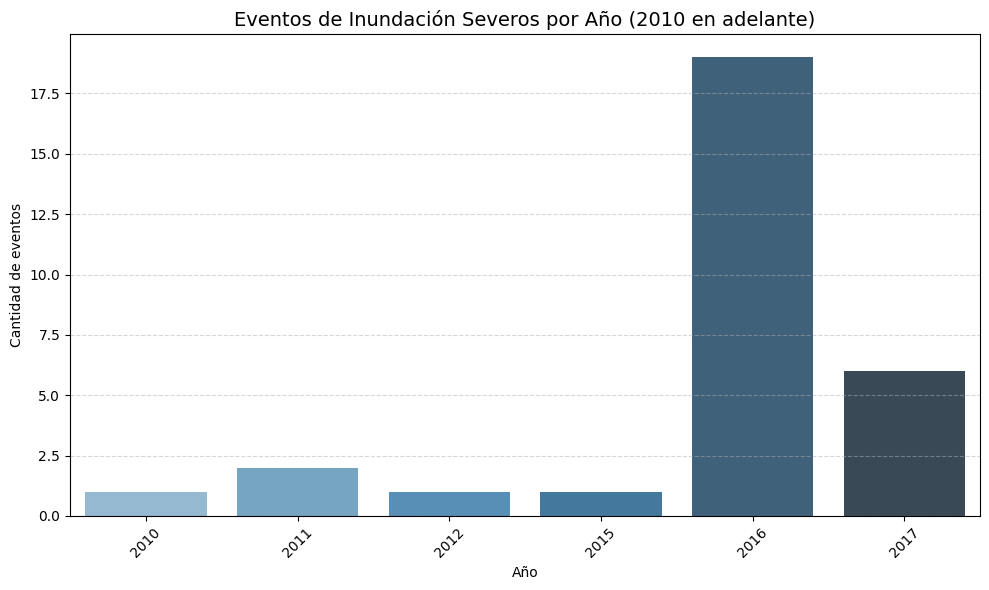

In [32]:
#visualizacion
import matplotlib.pyplot as plt
import seaborn as sns

# Crear una nueva columna con el año
bd_inundacion['anio'] = pd.to_datetime(bd_inundacion['registro_fecha']).dt.year

# Filtrar eventos severos desde 2010
eventos_severos = bd_inundacion[
    (bd_inundacion['intensidad'] == 'severa') &
    (bd_inundacion['anio'] >= 2010)
]

# Contar eventos por año
conteo_anual = eventos_severos['anio'].value_counts().sort_index()

# Crear la gráfica
plt.figure(figsize=(10, 6))
sns.barplot(x=conteo_anual.index, y=conteo_anual.values, palette="Blues_d")

plt.title("Eventos de Inundación Severos por Año (2010 en adelante)", fontsize=14)
plt.xlabel("Año")
plt.ylabel("Cantidad de eventos")
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

#Esta visualización muestra la cantidad de eventos severos de inundación registrados en Quibdó desde el año 2010. 
# Se observa cómo varía la frecuencia de estos eventos a lo largo del tiempo, lo que permite identificar posibles años críticos o picos inusuales en la ocurrencia de inundaciones severas.
#Esta información es útil para planear estrategias de prevención y respuesta.


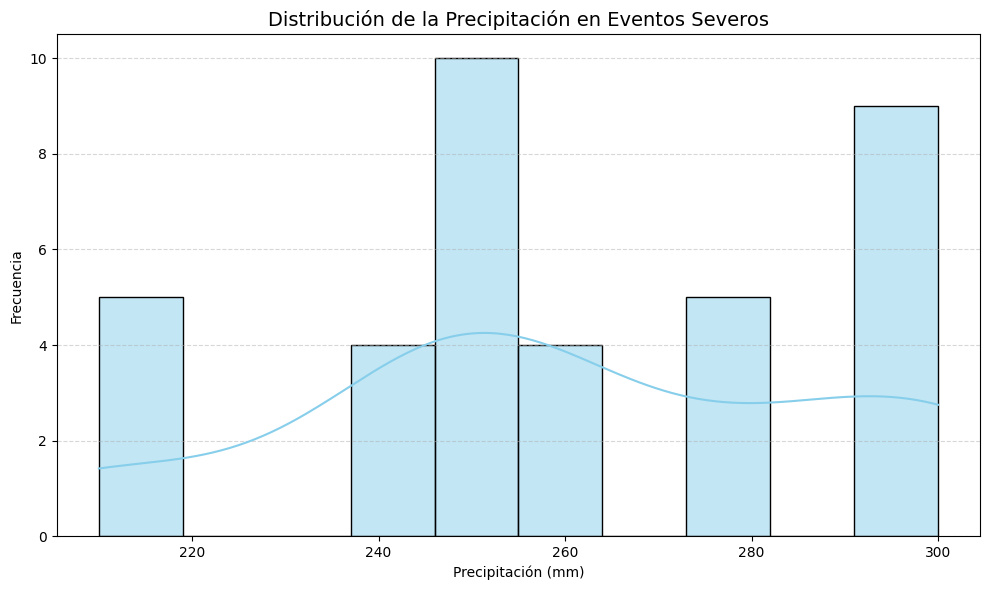

In [33]:
# Filtrar eventos severos (ya lo hicimos antes, pero por si acaso)
eventos_severos = bd_inundacion[bd_inundacion['intensidad'] == 'severa']

# Crear la gráfica de distribución
plt.figure(figsize=(10, 6))
sns.histplot(eventos_severos['precipitacion_mm'], bins=10, kde=True, color="skyblue")

plt.title("Distribución de la Precipitación en Eventos Severos", fontsize=14)
plt.xlabel("Precipitación (mm)")
plt.ylabel("Frecuencia")
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

#Esta gráfica muestra cómo se distribuye la precipitación durante los eventos de inundación severos. La mayoría de los eventos se concentran en un rango entre 200 y 300 mm, aunque se observan valores tanto menores como superiores.
#  Esta distribución ayuda a entender qué niveles de lluvia suelen estar asociados a los eventos más críticos, y puede servir como umbral de alerta para futuras predicciones.

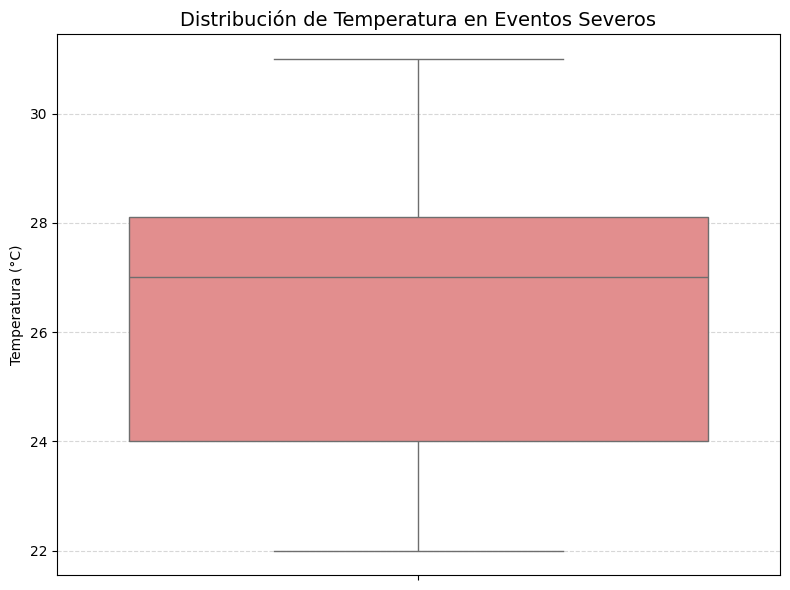

In [34]:
# Filtrar eventos severos
eventos_severos = bd_inundacion[bd_inundacion['intensidad'] == 'severa']

# Gráfico de caja para la temperatura
plt.figure(figsize=(8, 6))
sns.boxplot(data=eventos_severos, y='temperatura_c', color="lightcoral")

plt.title("Distribución de Temperatura en Eventos Severos", fontsize=14)
plt.ylabel("Temperatura (°C)")
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

#El gráfico de caja muestra cómo se distribuye la temperatura durante los eventos de inundación severos en Quibdó. Se observa que la mayoría de los valores están entre aproximadamente 24°C y 30°C, con una mediana cercana a los 26°C. Este tipo de visualización permite detectar valores atípicos que podrían indicar situaciones climáticas inusuales relacionadas con los eventos extremos.

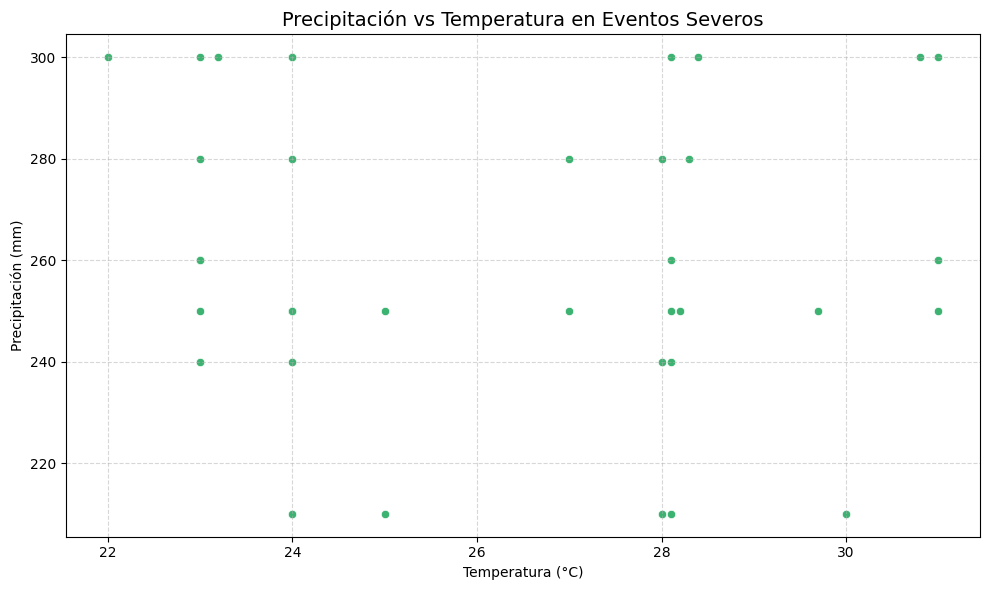

In [35]:
# Filtrar eventos severos (por si no lo tienes en memoria)
eventos_severos = bd_inundacion[bd_inundacion['intensidad'] == 'severa']

# Crear gráfico de dispersión
plt.figure(figsize=(10, 6))
sns.scatterplot(data=eventos_severos, x='temperatura_c', y='precipitacion_mm', color='mediumseagreen')

plt.title("Precipitación vs Temperatura en Eventos Severos", fontsize=14)
plt.xlabel("Temperatura (°C)")
plt.ylabel("Precipitación (mm)")
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

#Esta gráfica de dispersión muestra la relación entre la temperatura y la precipitación en eventos severos de inundación. Aunque no se observa una relación lineal clara, se puede notar que los valores de precipitación más altos se dan tanto en temperaturas moderadas como altas, lo que sugiere que la temperatura por sí sola no es un predictor directo del volumen de lluvia. Este análisis es útil para entender la interacción entre variables meteorológicas en contextos de emergencia.

C:\Users\joand\AppData\Local\Temp\ipykernel_17124\2665938210.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=eventos_severos, x='altura_agua', order=orden_altura, palette='YlOrRd')


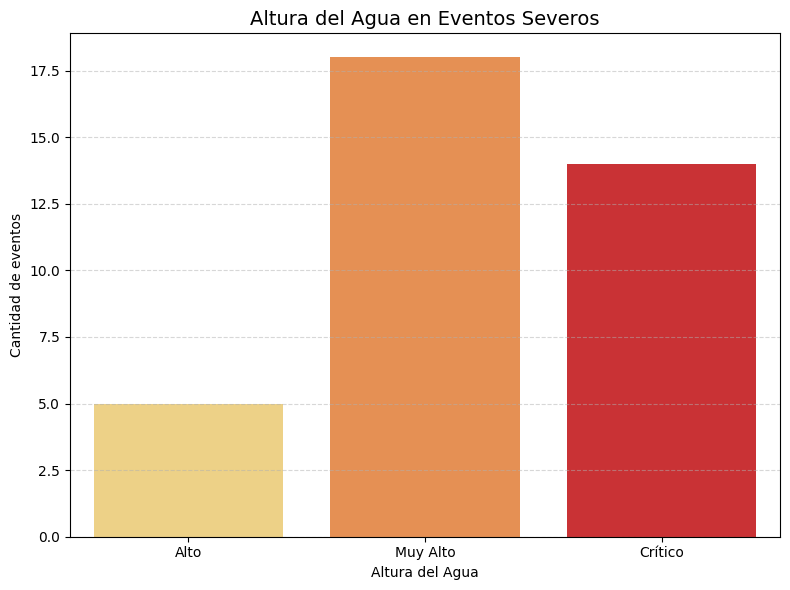

In [36]:
# Filtrar eventos severos
eventos_severos = bd_inundacion[bd_inundacion['intensidad'] == 'severa']

# Orden personalizado para altura del agua (opcional, si los nombres son correctos)
orden_altura = ['Alto', 'Muy Alto', 'Crítico']

# Gráfico de conteo
plt.figure(figsize=(8, 6))
sns.countplot(data=eventos_severos, x='altura_agua', order=orden_altura, palette='YlOrRd')

plt.title("Altura del Agua en Eventos Severos", fontsize=14)
plt.xlabel("Altura del Agua")
plt.ylabel("Cantidad de eventos")
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

#Esta gráfica muestra la cantidad de eventos severos según el nivel de altura del agua reportado. Se observa que la mayoría de los eventos se concentran en las categorías "Muy Alto" y "Crítico", lo que refuerza la severidad de los casos registrados. Este análisis es clave para priorizar zonas de mayor vulnerabilidad y para entender los niveles de alerta más comunes en Quibdó.

C:\Users\joand\AppData\Local\Temp\ipykernel_17124\3687125316.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=eventos_severos, x='nubosidad', palette='PuBu')


['nublado' 'muy nublado']


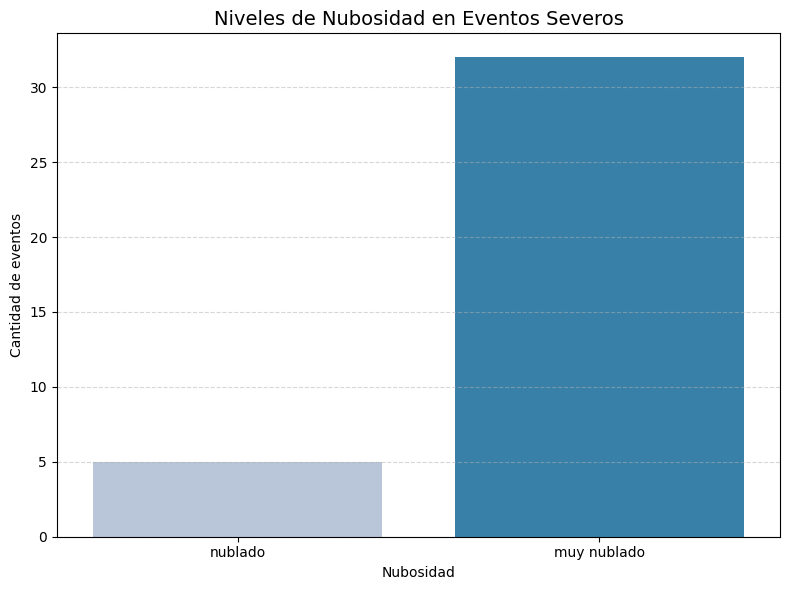

In [37]:
# Filtrar eventos severos
eventos_severos = bd_inundacion[bd_inundacion['intensidad'] == 'severa']

# Ver valores únicos (por si hay inconsistencias de escritura)
print(eventos_severos['nubosidad'].unique())

# Gráfico de conteo por tipo de nubosidad
plt.figure(figsize=(8, 6))
sns.countplot(data=eventos_severos, x='nubosidad', palette='PuBu')

plt.title("Niveles de Nubosidad en Eventos Severos", fontsize=14)
plt.xlabel("Nubosidad")
plt.ylabel("Cantidad de eventos")
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()
#Esta gráfica muestra la frecuencia de los distintos niveles de nubosidad durante eventos de inundación severa. Se observa que "muy nublado" es el tipo más común, lo cual es coherente con condiciones climáticas propicias para lluvias intensas. Este tipo de análisis ayuda a identificar patrones atmosféricos clave que anteceden a eventos críticos.

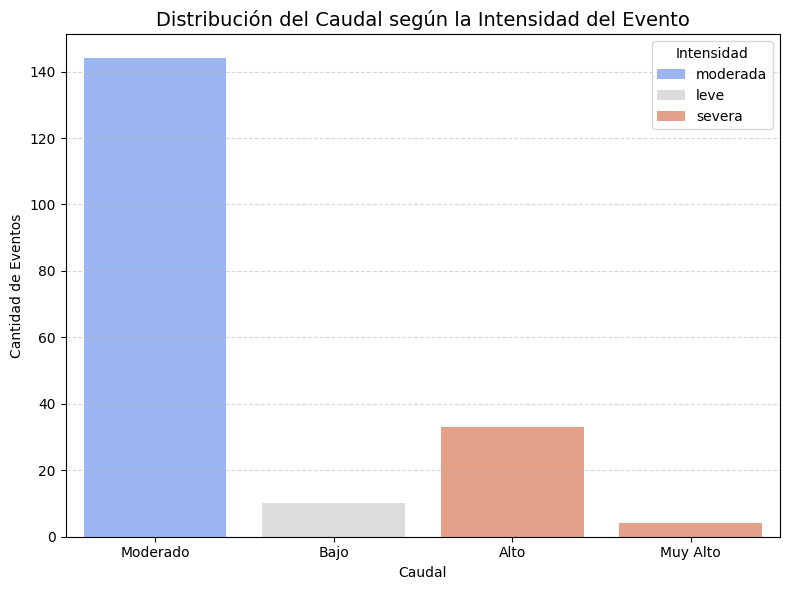

In [38]:
plt.figure(figsize=(8, 6))
sns.countplot(data=bd_inundacion, x='caudal', hue='intensidad', palette='coolwarm')

plt.title("Distribución del Caudal según la Intensidad del Evento", fontsize=14)
plt.xlabel("Caudal")
plt.ylabel("Cantidad de Eventos")
plt.legend(title='Intensidad')
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

#Esta visualización permite observar cómo varía el caudal del río en función de la intensidad del evento. Se nota que los caudales altos están más asociados con eventos de intensidad severa, mientras que los caudales moderados o bajos aparecen en eventos leves o moderados. Esto sugiere que monitorear el caudal puede ser una herramienta predictiva útil para anticipar la severidad de una posible inundación.



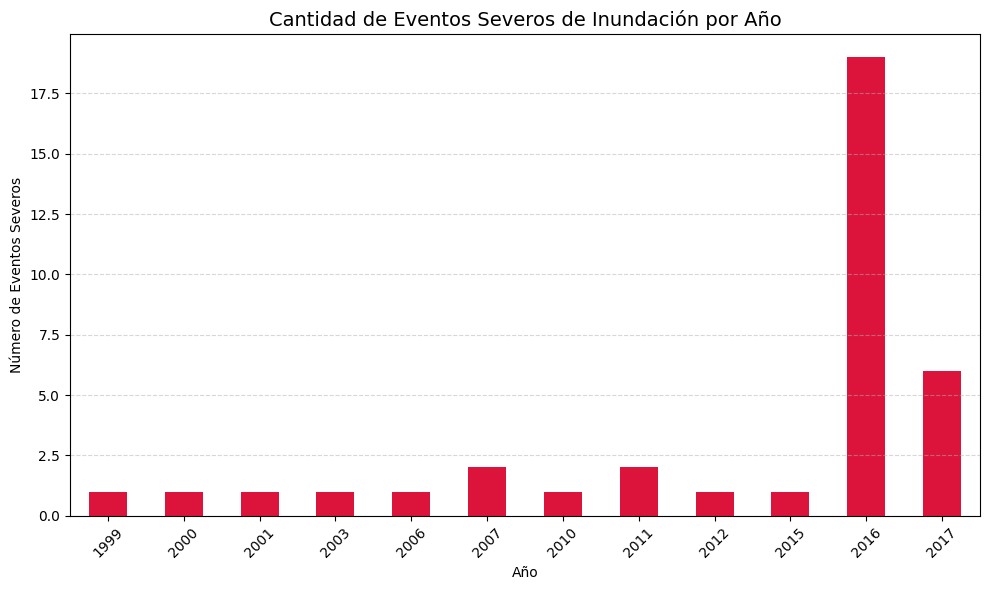

In [39]:
# Asegurarse de que la columna de fecha está en formato datetime
bd_inundacion['registro_fecha'] = pd.to_datetime(bd_inundacion['registro_fecha'])

# Crear una nueva columna con el año
bd_inundacion['anio'] = bd_inundacion['registro_fecha'].dt.year

# Filtrar los eventos severos
eventos_severos = bd_inundacion[bd_inundacion['intensidad'] == 'severa']

# Contar la cantidad de eventos severos por año
conteo_severos = eventos_severos['anio'].value_counts().sort_index()

# Graficar
plt.figure(figsize=(10, 6))
conteo_severos.plot(kind='bar', color='crimson')
plt.title('Cantidad de Eventos Severos de Inundación por Año', fontsize=14)
plt.xlabel('Año')
plt.ylabel('Número de Eventos Severos')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

#Este gráfico de barras muestra cómo han variado los eventos severos de inundación por año en Quibdó. Se pueden identificar picos en ciertos años, lo cual puede estar relacionado con fenómenos climáticos extremos como El Niño o La Niña. Esta información es útil para diseñar estrategias de prevención más efectivas en años de alto riesgo.

Matriz de Correlación (Pearson):
                  estado_climatico  indice_humedad  precipitacion_mm  \
estado_climatico          1.000000       -0.127498         -0.056376   
indice_humedad           -0.127498        1.000000          0.038575   
precipitacion_mm         -0.056376        0.038575          1.000000   
temperatura_c            -0.270307        0.302601         -0.000250   

                  temperatura_c  
estado_climatico      -0.270307  
indice_humedad         0.302601  
precipitacion_mm      -0.000250  
temperatura_c          1.000000  


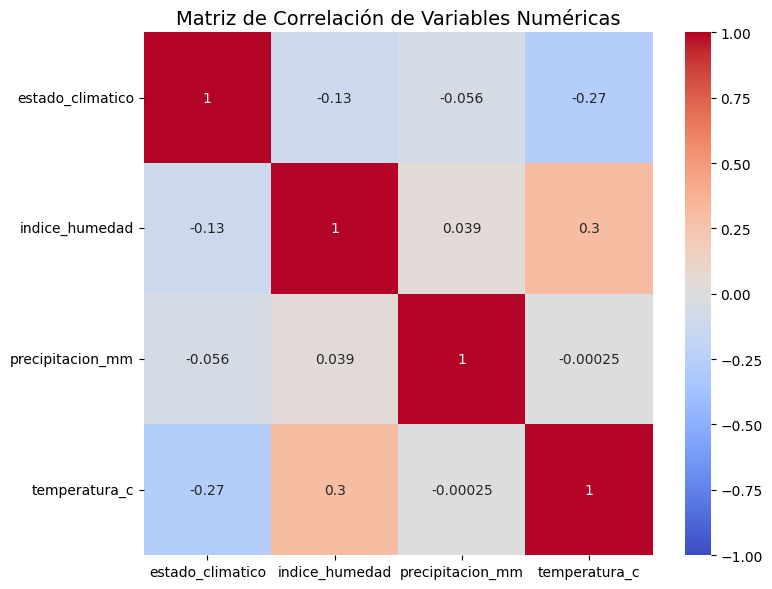

In [40]:
# Matriz de correlación con datos originales
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Seleccionar las columnas numéricas para el análisis de correlación
columnas_numericas = ['estado_climatico', 'indice_humedad', 'precipitacion_mm', 'temperatura_c']

# Calcular la matriz de correlación
correlation_matrix = bd_inundacion[columnas_numericas].corr(method='pearson')

# Mostrar la matriz de correlación
print("Matriz de Correlación (Pearson):")
print(correlation_matrix)

# Visualización de la matriz de correlación con un heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1, center=0)
plt.title('Matriz de Correlación de Variables Numéricas', fontsize=14)
plt.tight_layout()
plt.show()





C:\Users\joand\AppData\Local\Temp\ipykernel_17124\1154670939.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  eventos_severos['registro_fecha'] = pd.to_datetime(eventos_severos['registro_fecha'])


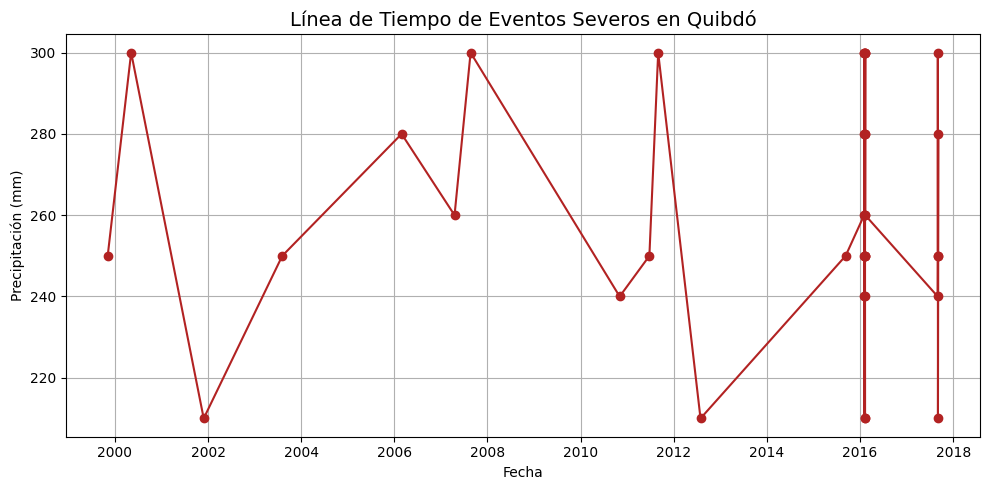

In [41]:
# Filtrar eventos severos
eventos_severos = bd_inundacion[bd_inundacion['intensidad'] == 'severa']

# Asegurarse de que la columna de fecha esté en formato datetime
eventos_severos['registro_fecha'] = pd.to_datetime(eventos_severos['registro_fecha'])

# Ordenar por fecha
eventos_severos = eventos_severos.sort_values('registro_fecha')

# Crear gráfico de línea de tiempo
plt.figure(figsize=(10, 5))
plt.plot(eventos_severos['registro_fecha'], eventos_severos['precipitacion_mm'], 
         marker='o', linestyle='-', color='firebrick')
plt.title('Línea de Tiempo de Eventos Severos en Quibdó', fontsize=14)
plt.xlabel('Fecha')
plt.ylabel('Precipitación (mm)')
plt.grid(True)
plt.tight_layout()
plt.show()

#Esta visualización muestra una línea de tiempo de eventos de inundación severa en Quibdó. Cada punto representa un evento severo con su respectiva cantidad de precipitación. Es útil para identificar si hay épocas del año donde ocurren con mayor frecuencia estos eventos extremos, facilitando la planificación de prevención.



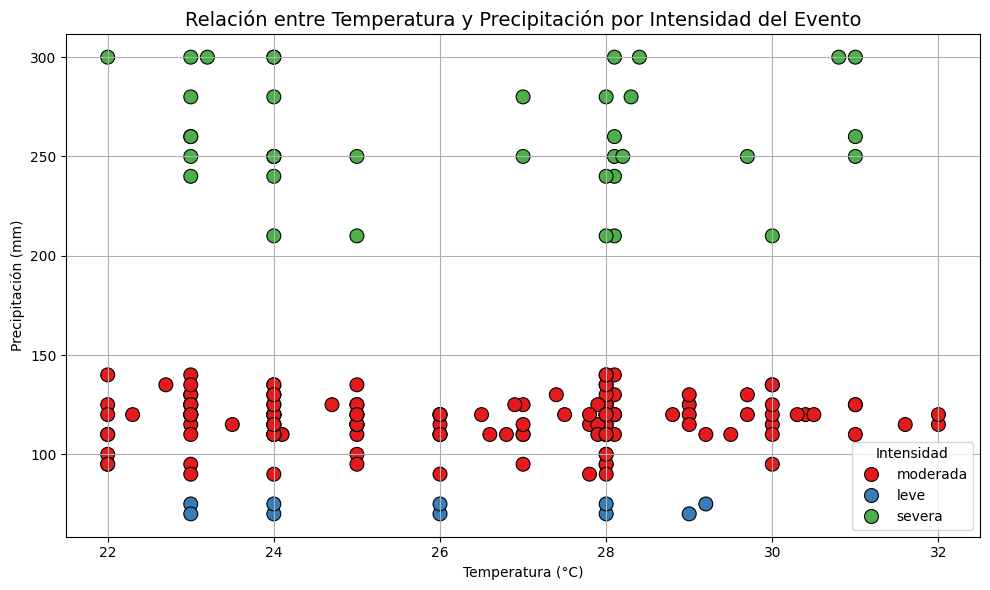

In [42]:
plt.figure(figsize=(10, 6))
sns.scatterplot(
    data=bd_inundacion,
    x='temperatura_c',
    y='precipitacion_mm',
    hue='intensidad',
    palette='Set1',
    s=100,
    edgecolor='black'
)
plt.title('Relación entre Temperatura y Precipitación por Intensidad del Evento', fontsize=14)
plt.xlabel('Temperatura (°C)')
plt.ylabel('Precipitación (mm)')
plt.grid(True)
plt.tight_layout()
plt.legend(title='Intensidad')
plt.show()

#Este gráfico permite analizar si hay una relación entre la temperatura y la cantidad de precipitación según la intensidad del evento. Por ejemplo, se puede observar si las inundaciones severas tienden a ocurrir con temperaturas más altas o con mayor precipitación, ayudando a identificar posibles condiciones críticas para futuras alertas.

C:\Users\joand\AppData\Local\Temp\ipykernel_17124\2151113588.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


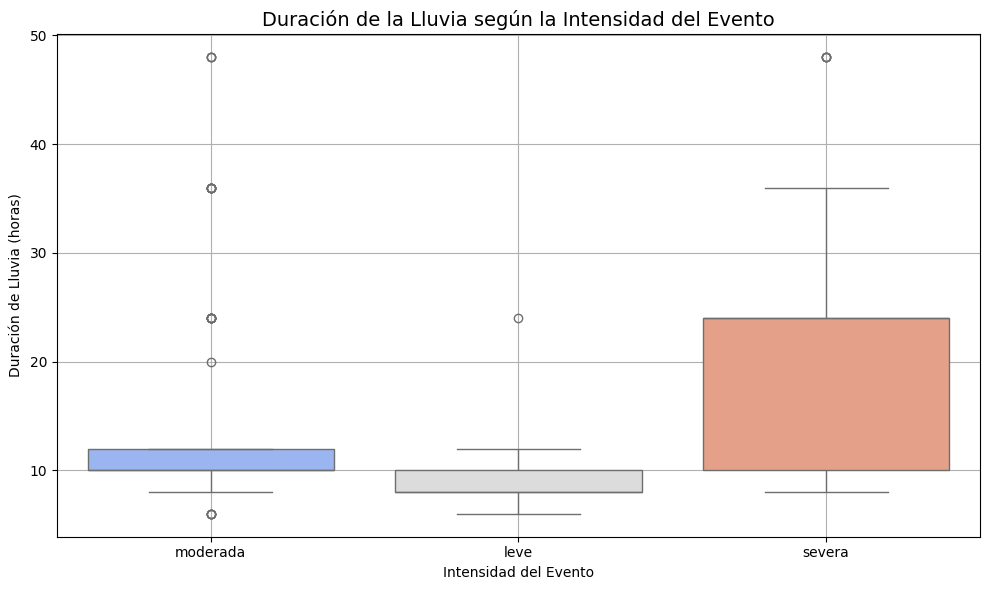

In [43]:
# Convertir 'duracion_lluvia' a valores numéricos en horas (si aún no se ha hecho)
bd_inundacion['duracion_lluvia_h'] = bd_inundacion['duracion_lluvia'].str.replace('h', '').astype(float)

plt.figure(figsize=(10, 6))
sns.boxplot(
    data=bd_inundacion,
    x='intensidad',
    y='duracion_lluvia_h',
    palette='coolwarm'
)
plt.title('Duración de la Lluvia según la Intensidad del Evento', fontsize=14)
plt.xlabel('Intensidad del Evento')
plt.ylabel('Duración de Lluvia (horas)')
plt.grid(True)
plt.tight_layout()
plt.show()

#Este gráfico de caja muestra cómo varía la duración de la lluvia dependiendo de la intensidad del evento. Se puede ver si las inundaciones severas tienden a tener lluvias más prolongadas que las leves o moderadas. Es útil para establecer umbrales de riesgo según la duración del evento climático.



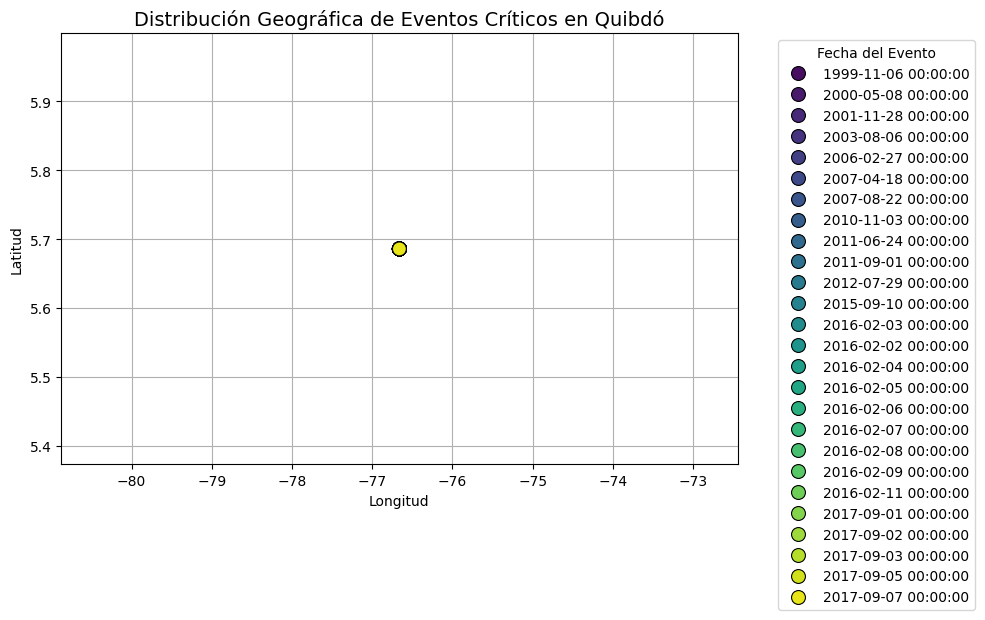

In [44]:
# Filtrar eventos críticos (ya lo hiciste en el paso 5, puedes usar esa variable)
eventos_criticos = bd_inundacion[bd_inundacion['intensidad'] == 'severa']

plt.figure(figsize=(10, 6))
sns.scatterplot(
    data=eventos_criticos,
    x='longitud',
    y='latitud',
    hue='registro_fecha',
    palette='viridis',
    s=100,
    edgecolor='black'
)
plt.title('Distribución Geográfica de Eventos Críticos en Quibdó', fontsize=14)
plt.xlabel('Longitud')
plt.ylabel('Latitud')
plt.legend(title='Fecha del Evento', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.tight_layout()
plt.show()

#

C:\Users\joand\AppData\Local\Temp\ipykernel_17124\2746400347.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  eventos_criticos['año'] = eventos_criticos['registro_fecha'].dt.year
C:\Users\joand\AppData\Local\Temp\ipykernel_17124\2746400347.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=frecuencia_anual.index, y=frecuencia_anual.values, palette='rocket')


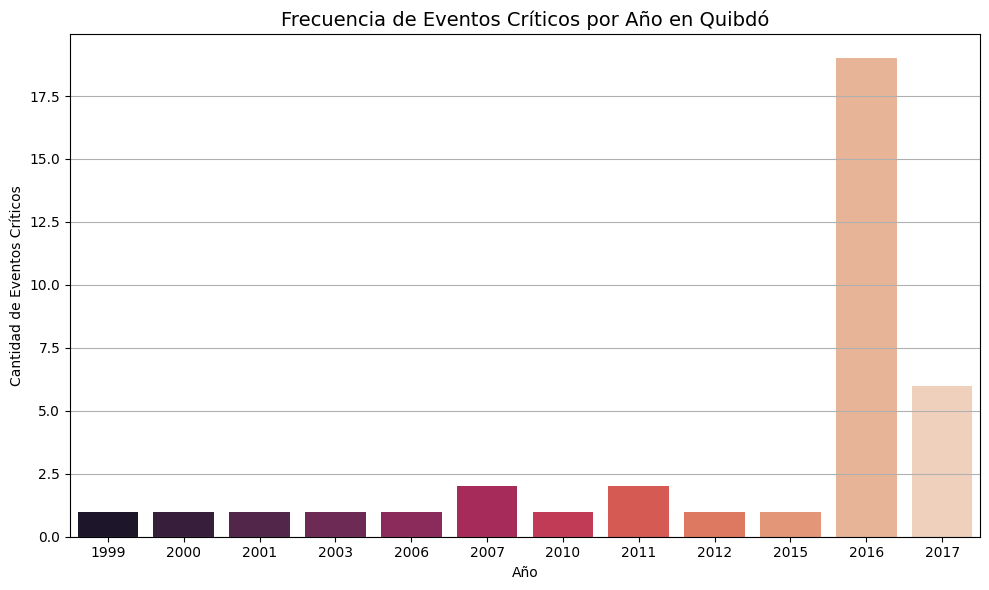

In [45]:
# Asegurarse que 'registro_fecha' esté en formato datetime (ya hecho en pasos anteriores)
# Crear columna 'año' para agrupar
eventos_criticos['año'] = eventos_criticos['registro_fecha'].dt.year

# Contar eventos por año
frecuencia_anual = eventos_criticos['año'].value_counts().sort_index()

# Graficar
plt.figure(figsize=(10, 6))
sns.barplot(x=frecuencia_anual.index, y=frecuencia_anual.values, palette='rocket')
plt.title('Frecuencia de Eventos Críticos por Año en Quibdó', fontsize=14)
plt.xlabel('Año')
plt.ylabel('Cantidad de Eventos Críticos')
plt.grid(axis='y')
plt.tight_layout()
plt.show()

#Este gráfico de barras permite observar en qué años se han registrado más eventos críticos (inundaciones severas) en Quibdó. Esto facilita la identificación de periodos especialmente vulnerables, lo cual es clave para la planeación preventiva.



C:\Users\joand\AppData\Local\Temp\ipykernel_17124\2852981396.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=bd_inundacion, x='intensidad', y='precipitacion_mm', palette='Set2')


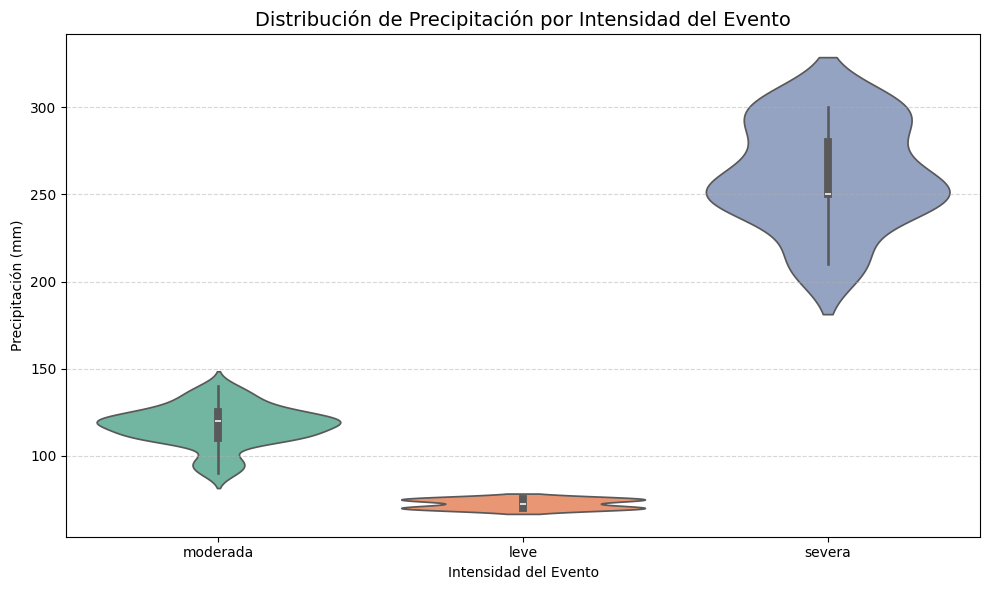

In [46]:
# Gráfico de violín: distribución de la precipitación según la intensidad del evento
plt.figure(figsize=(10, 6))
sns.violinplot(data=bd_inundacion, x='intensidad', y='precipitacion_mm', palette='Set2')
plt.title('Distribución de Precipitación por Intensidad del Evento', fontsize=14)
plt.xlabel('Intensidad del Evento')
plt.ylabel('Precipitación (mm)')
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()


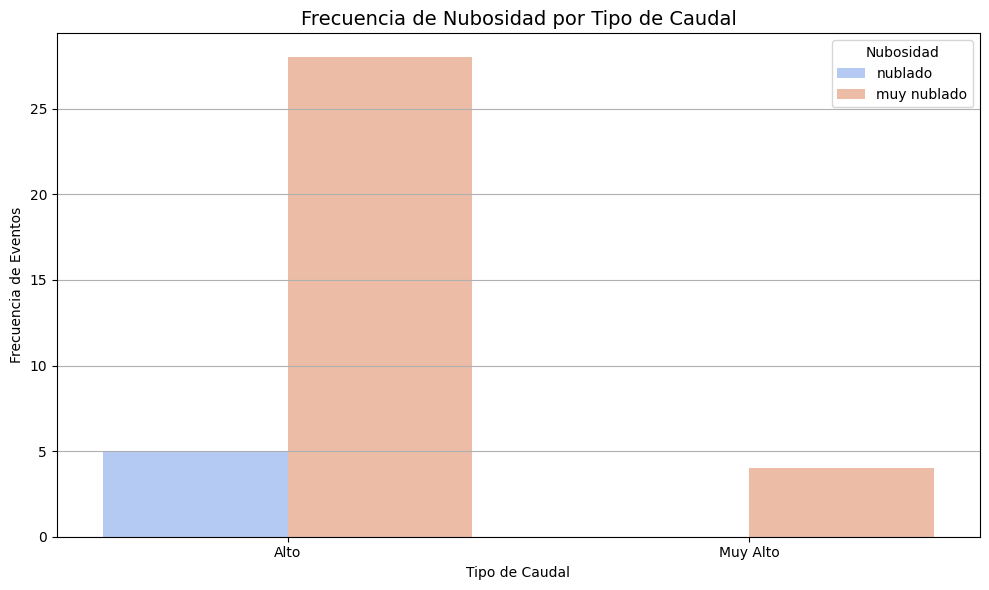

In [47]:
plt.figure(figsize=(10, 6))
sns.countplot(data=eventos_criticos, x='caudal', hue='nubosidad', palette='coolwarm')

plt.title('Frecuencia de Nubosidad por Tipo de Caudal', fontsize=14)
plt.xlabel('Tipo de Caudal')
plt.ylabel('Frecuencia de Eventos')
plt.legend(title='Nubosidad')
plt.grid(axis='y')
plt.tight_layout()
plt.show()

#Esta visualización muestra cuántas veces se presentan distintos tipos de nubosidad (nublado, parcial, muy nublado) según los niveles de caudal (bajo, moderado, alto). La relación entre ambos factores ayuda a identificar condiciones atmosféricas que acompañan caudales elevados en eventos críticos.



C:\Users\joand\AppData\Local\Temp\ipykernel_17124\693037853.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=eventos_criticos, x='duracion_lluvia', palette='Blues')


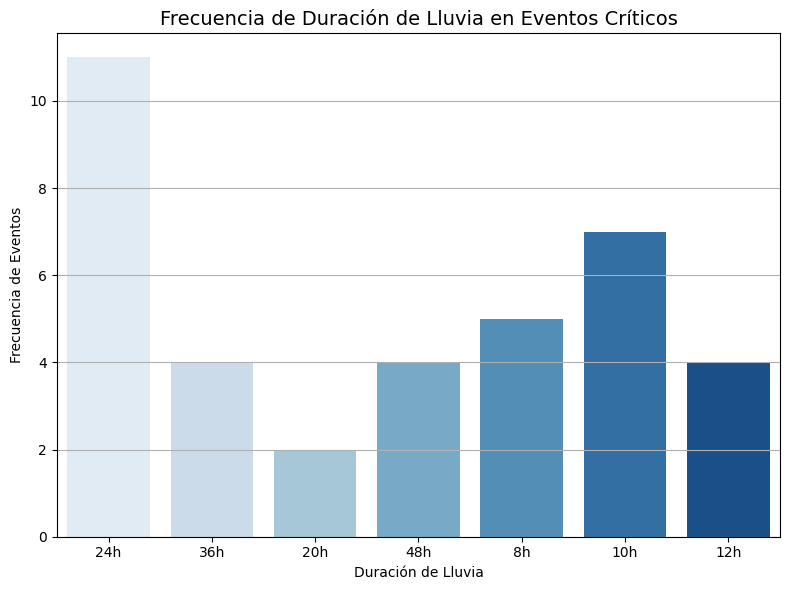

In [48]:
plt.figure(figsize=(8, 6))
sns.countplot(data=eventos_criticos, x='duracion_lluvia', palette='Blues')

plt.title('Frecuencia de Duración de Lluvia en Eventos Críticos', fontsize=14)
plt.xlabel('Duración de Lluvia')
plt.ylabel('Frecuencia de Eventos')
plt.grid(axis='y')
plt.tight_layout()
plt.show()

#Esta gráfica muestra cuántas veces se han registrado diferentes duraciones de lluvia durante eventos severos. Las duraciones más frecuentes (como 24h y 36h) podrían estar asociadas a condiciones meteorológicas más extremas, lo que ayuda a establecer umbrales de alerta temprana.



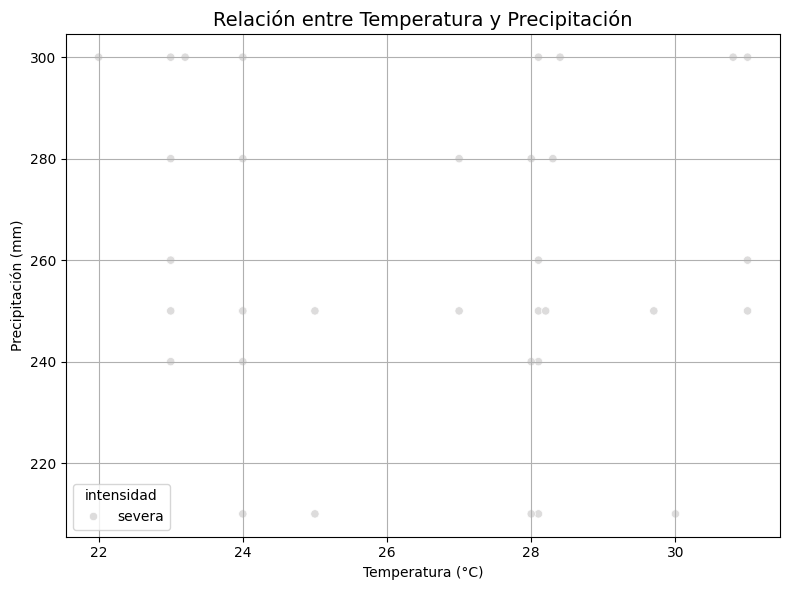

In [49]:
plt.figure(figsize=(8, 6))
sns.scatterplot(
    data=eventos_criticos,
    x='temperatura_c',
    y='precipitacion_mm',
    hue='intensidad',
    palette='coolwarm'
)
plt.title('Relación entre Temperatura y Precipitación', fontsize=14)
plt.xlabel('Temperatura (°C)')
plt.ylabel('Precipitación (mm)')
plt.grid(True)
plt.tight_layout()
plt.show()


C:\Users\joand\AppData\Local\Temp\ipykernel_17124\516870213.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=eventos_criticos, x='caudal', y='precipitacion_mm', palette='Blues')


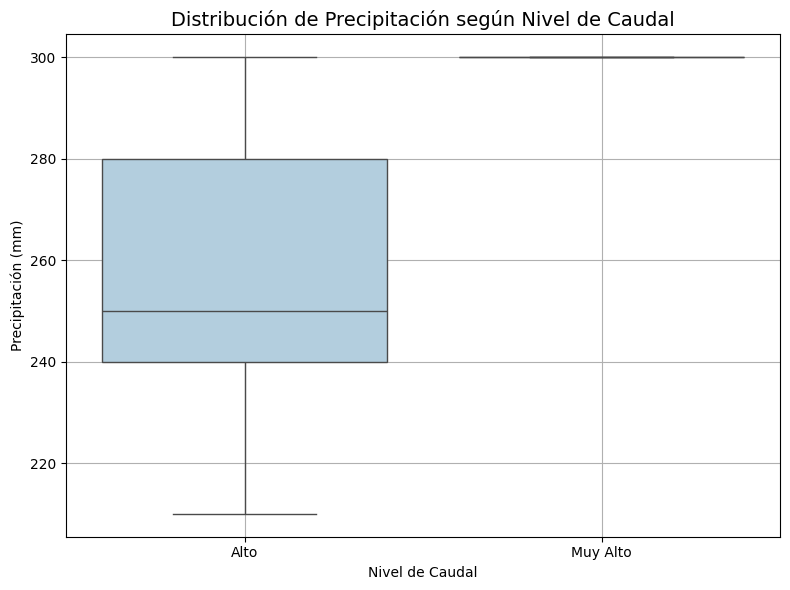

In [50]:
plt.figure(figsize=(8, 6))
sns.boxplot(data=eventos_criticos, x='caudal', y='precipitacion_mm', palette='Blues')

plt.title('Distribución de Precipitación según Nivel de Caudal', fontsize=14)
plt.xlabel('Nivel de Caudal')
plt.ylabel('Precipitación (mm)')
plt.grid(True)
plt.tight_layout()
plt.show()

#El gráfico muestra que los niveles de caudal alto están asociados con una mayor variabilidad en los valores de precipitación. Esto sugiere que eventos con alto caudal del río presentan mayores riesgos de acumulación de agua, especialmente cuando las lluvias superan los 200 mm.



C:\Users\joand\AppData\Local\Temp\ipykernel_17124\32487212.py:7: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(title='Clima', fontsize=10)


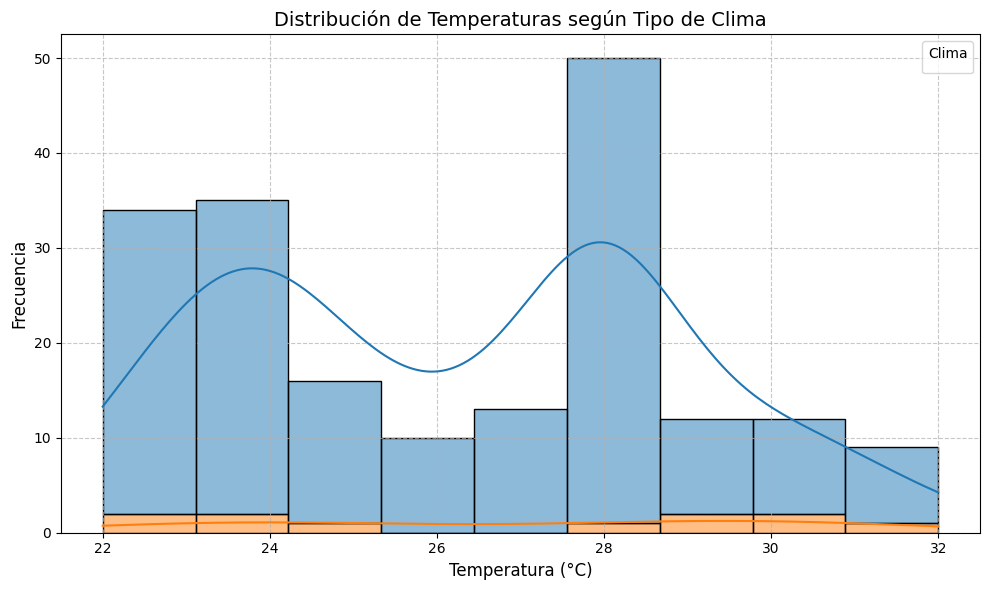

In [51]:
#Distribución de temperaturas según tipo de clima
plt.figure(figsize=(10, 6))
sns.histplot(data=bd_inundacion, x='temperatura_c', hue='clima', kde=True, multiple='stack')
plt.title('Distribución de Temperaturas según Tipo de Clima', fontsize=14)
plt.xlabel('Temperatura (°C)', fontsize=12)
plt.ylabel('Frecuencia', fontsize=12)
plt.legend(title='Clima', fontsize=10)
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


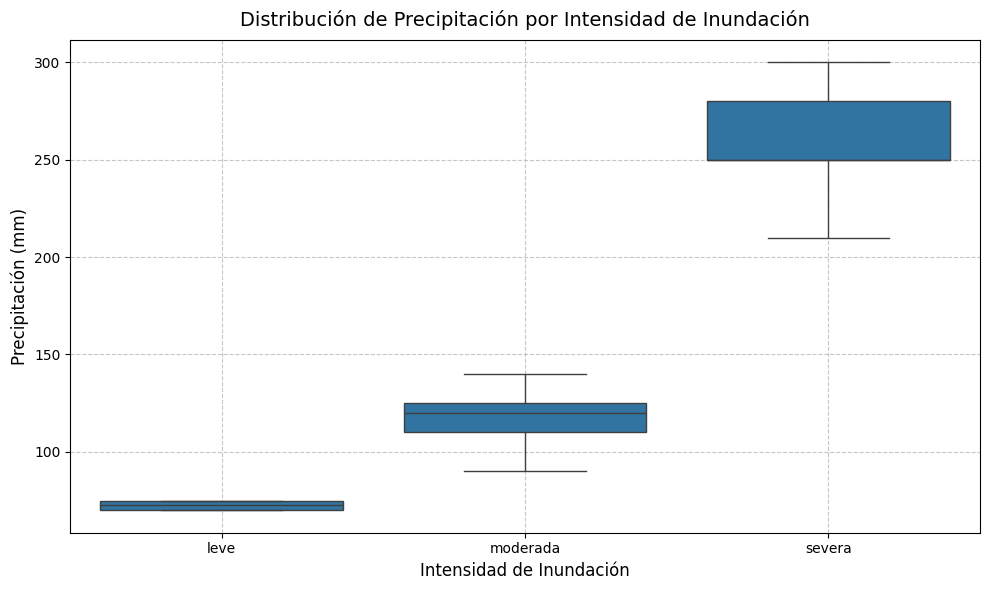

In [52]:
#  Boxplot de Precipitación por Intensidad
plt.figure(figsize=(10, 6))
sns.boxplot(x='intensidad', y='precipitacion_mm', data=bd_inundacion, order=['leve', 'moderada', 'severa'])
plt.title('Distribución de Precipitación por Intensidad de Inundación', fontsize=14, pad=10)
plt.xlabel('Intensidad de Inundación', fontsize=12)
plt.ylabel('Precipitación (mm)', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


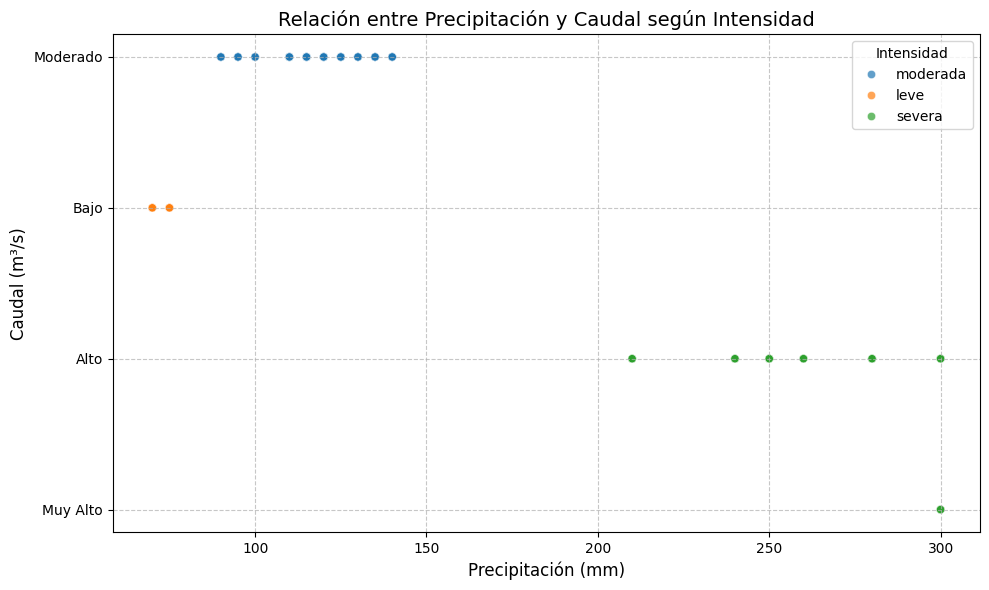

In [53]:
#Relación entre precipitación y caudal según intensidad
plt.figure(figsize=(10, 6))
sns.scatterplot(data=bd_inundacion, x='precipitacion_mm', y='caudal', hue='intensidad', alpha=0.7)
plt.title('Relación entre Precipitación y Caudal según Intensidad', fontsize=14)
plt.xlabel('Precipitación (mm)', fontsize=12)
plt.ylabel('Caudal (m³/s)', fontsize=12)
plt.legend(title='Intensidad', fontsize=10)
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


In [54]:
bd_final.head()

,id_estacion,registro_fecha,clima,estado_climatico,indice_humedad,longitud,latitud,precipitacion_mm,temperatura_c,intensidad_moderada,...,duracion_lluvia_12h,duracion_lluvia_20h,duracion_lluvia_24h,duracion_lluvia_36h,duracion_lluvia_48h,duracion_lluvia_6h,duracion_lluvia_8h,duracion_lluvia_9h,nubosidad_nublado,nubosidad_parcial
0,80144,1998-11-20,lluvioso,0.141507,0.838128,-76.6611,5.6858,-0.868248,0.581123,True,...,False,False,False,False,False,False,False,False,True,False
1,80144,1999-03-27,lluvioso,0.378594,0.838128,-76.6611,5.6858,-1.196797,0.656861,False,...,False,False,False,False,False,False,True,False,False,True
2,80144,1999-11-06,lluvioso,0.378594,0.838128,-76.6611,5.6858,1.760147,0.694730,False,...,False,False,True,False,False,False,False,False,True,False
3,80144,2000-05-08,lluvioso,0.141507,0.838128,-76.6611,5.6858,2.581521,0.694730,False,...,False,False,False,True,False,False,False,False,False,False
4,80144,2000-12-04,lluvioso,0.378594,0.838128,-76.6611,5.6858,-0.375424,0.656861,True,...,False,False,False,False,False,False,False,False,True,False


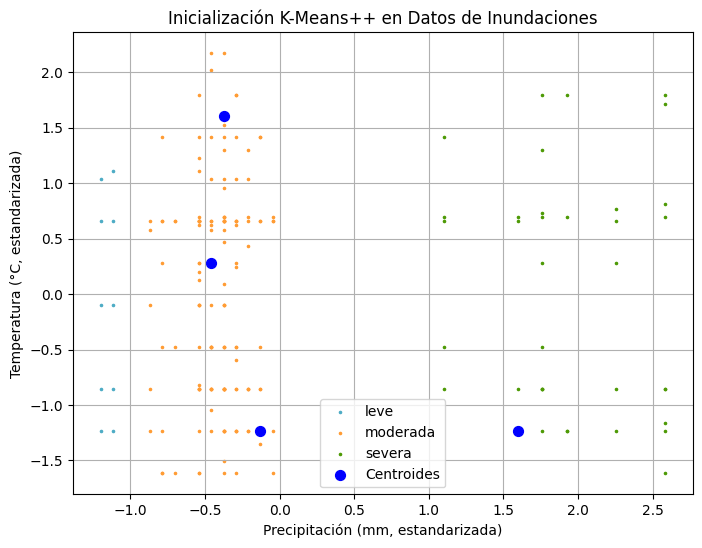

In [55]:
# Celda para añadir después de las existentes en main.ipynb
import matplotlib.pyplot as plt
from sklearn.cluster import kmeans_plusplus

# Seleccionar características para clustering (precipitación y temperatura estandarizadas)
X = bd_transformada[['precipitacion_mm', 'temperatura_c']].values

# Definir número de clústeres
n_clusters = 4

# Calcular centroides iniciales con k-means++
centers_init, indices = kmeans_plusplus(X, n_clusters=n_clusters, random_state=0)

# Graficar puntos coloreados por intensidad de inundación
plt.figure(figsize=(8, 6))
colors = {'leve': '#4EACC5', 'moderada': '#FF9C34', 'severa': '#4E9A06'}
intensidad_labels = bd_inundacion['intensidad'].values

for intensity in colors:
    mask = intensidad_labels == intensity
    plt.scatter(X[mask, 0], X[mask, 1], c=colors[intensity], label=intensity, marker=".", s=10)

# Graficar centroides iniciales de k-means++
plt.scatter(centers_init[:, 0], centers_init[:, 1], c='blue', marker='o', s=50, label='Centroides')

# Personalizar gráfico
plt.title("Inicialización K-Means++ en Datos de Inundaciones")
plt.xlabel("Precipitación (mm, estandarizada)")
plt.ylabel("Temperatura (°C, estandarizada)")
plt.legend()
plt.grid(True)
plt.show()

<h1>Análisis de Clustering con K-Means y Visualización PCA</h1>

In [56]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns

# Cargar el archivo limpio
bd_inundacion = pd.read_csv("inundacion_limpia.csv")

# Seleccionar columnas numéricas para clustering (excluye columnas tipo objeto como fechas, nombres, etc.)
columnas_numericas = bd_inundacion.select_dtypes(include=['int64', 'float64']).columns
bd_numerico = bd_inundacion[columnas_numericas]

# Estandarizar datos
scaler = StandardScaler()
bd_normalizado = scaler.fit_transform(bd_numerico)

In [57]:
# Elegimos 3 clusters 
kmeans = KMeans(n_clusters=3, random_state=0, n_init=10)
clusters = kmeans.fit_predict(bd_normalizado)

# Agregar columna de cluster al DataFrame original
bd_inundacion['cluster'] = clusters


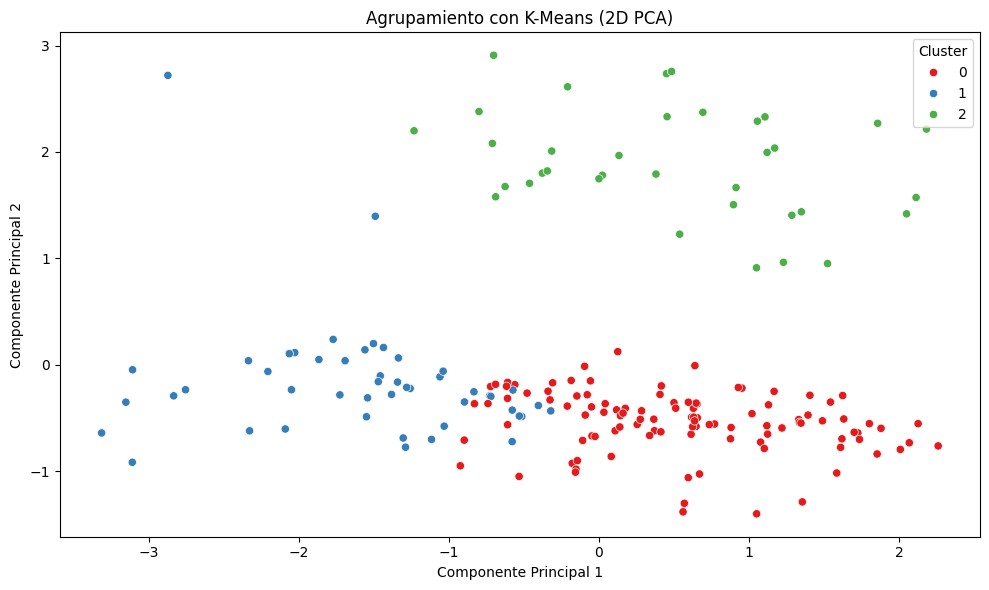

In [58]:
# Reducir dimensiones para visualizar en 2D
pca = PCA(n_components=2)
X_pca = pca.fit_transform(bd_normalizado)
df_pca = pd.DataFrame(X_pca, columns=['PC1', 'PC2'])
df_pca['cluster'] = clusters

# Graficar
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_pca, x='PC1', y='PC2', hue='cluster', palette='Set1')
plt.title('Agrupamiento con K-Means (2D PCA)')
plt.xlabel('Componente Principal 1')
plt.ylabel('Componente Principal 2')
plt.legend(title='Cluster')
plt.tight_layout()
plt.show()


In [59]:
import pandas as pd

# Cargar el archivo limpio
bd_inundacion = pd.read_csv("inundacion_limpia.csv")
print(bd_inundacion.shape)
bd_inundacion.head()


(191, 19)


,id_estacion,registro_fecha,departamento,municipio,evento,intensidad,zona_hidrografica,altura_agua,caudal,duracion_lluvia,clima,estado_climatico,nubosidad,indice_humedad,longitud,latitud,precipitacion_mm,temperatura_c,unidad_media_c
0,80144,1998-11-20,Chocó,Quibdó,inundacion,moderada,Atrato,Alto,Moderado,10h,lluvioso,8,nublado,100.0,-76.6611,5.6858,90,27.8,°C
1,80144,1999-03-27,Chocó,Quibdó,inundacion,leve,Atrato,Medio,Bajo,8h,lluvioso,9,parcial,100.0,-76.6611,5.6858,70,28.0,°C
2,80144,1999-11-06,Chocó,Quibdó,inundacion,severa,Atrato,Muy Alto,Alto,24h,lluvioso,9,nublado,100.0,-76.6611,5.6858,250,28.1,°C
3,80144,2000-05-08,Chocó,Quibdó,inundacion,severa,Atrato,Crítico,Alto,36h,lluvioso,8,muy nublado,100.0,-76.6611,5.6858,300,28.1,°C
4,80144,2000-12-04,Chocó,Quibdó,inundacion,moderada,Atrato,Alto,Moderado,10h,lluvioso,9,nublado,100.0,-76.6611,5.6858,120,28.0,°C


In [60]:
# Seleccionamos solo columnas numéricas para el clustering
columnas_numericas = bd_inundacion.select_dtypes(include=['int64', 'float64']).columns
bd_numerico = bd_inundacion[columnas_numericas]
bd_numerico.head()


,id_estacion,estado_climatico,indice_humedad,longitud,latitud,precipitacion_mm,temperatura_c
0,80144,8,100.0,-76.6611,5.6858,90,27.8
1,80144,9,100.0,-76.6611,5.6858,70,28.0
2,80144,9,100.0,-76.6611,5.6858,250,28.1
3,80144,8,100.0,-76.6611,5.6858,300,28.1
4,80144,9,100.0,-76.6611,5.6858,120,28.0


In [61]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
bd_normalizado = pd.DataFrame(scaler.fit_transform(bd_numerico), columns=columnas_numericas)


In [62]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=3, random_state=0)
clusters = kmeans.fit_predict(bd_normalizado)

# Agregamos la columna al dataframe original
bd_inundacion['cluster'] = clusters
bd_normalizado['cluster'] = clusters


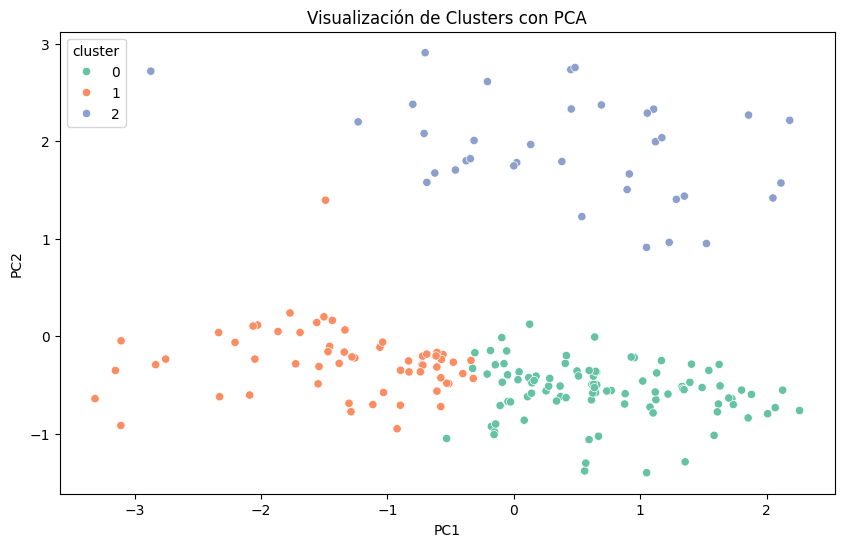

In [63]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns

pca = PCA(n_components=2)
X_pca = pca.fit_transform(bd_normalizado.drop(columns='cluster'))

df_pca = pd.DataFrame(X_pca, columns=['PC1', 'PC2'])
df_pca['cluster'] = clusters

plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_pca, x='PC1', y='PC2', hue='cluster', palette='Set2')
plt.title('Visualización de Clusters con PCA')
plt.show()


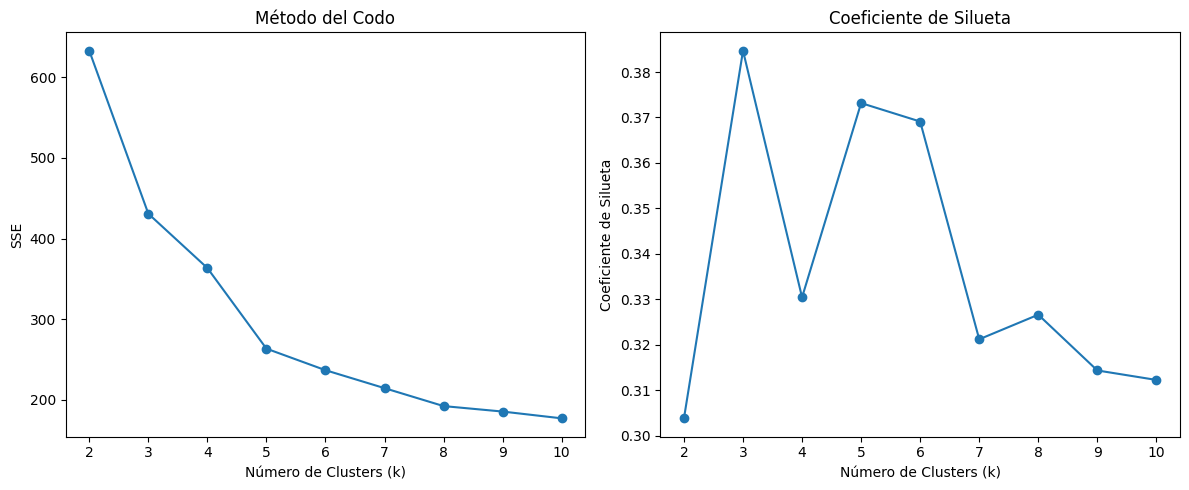

In [64]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt

# Determinar el mejor número de clusters (k) usando el método del codo y el coeficiente de silueta
def determinar_mejor_k(data, max_k=10):
    sse = []
    silhouette_scores = []
    k_range = range(2, max_k + 1)
    
    for k in k_range:
        kmeans = KMeans(n_clusters=k, random_state=0)
        kmeans.fit(data)
        sse.append(kmeans.inertia_)
        silhouette_avg = silhouette_score(data, kmeans.labels_)
        silhouette_scores.append(silhouette_avg)
    
    # Graficar el método del codo
    plt.figure(figsize=(12, 5))
    
    plt.subplot(1, 2, 1)
    plt.plot(k_range, sse, marker='o')
    plt.title('Método del Codo')
    plt.xlabel('Número de Clusters (k)')
    plt.ylabel('SSE')
    
    # Graficar el coeficiente de silueta
    plt.subplot(1, 2, 2)
    plt.plot(k_range, silhouette_scores, marker='o')
    plt.title('Coeficiente de Silueta')
    plt.xlabel('Número de Clusters (k)')
    plt.ylabel('Coeficiente de Silueta')
    
    plt.tight_layout()
    plt.show()

# Llamar a la función usando el DataFrame normalizado del proyecto
determinar_mejor_k(bd_normalizado)

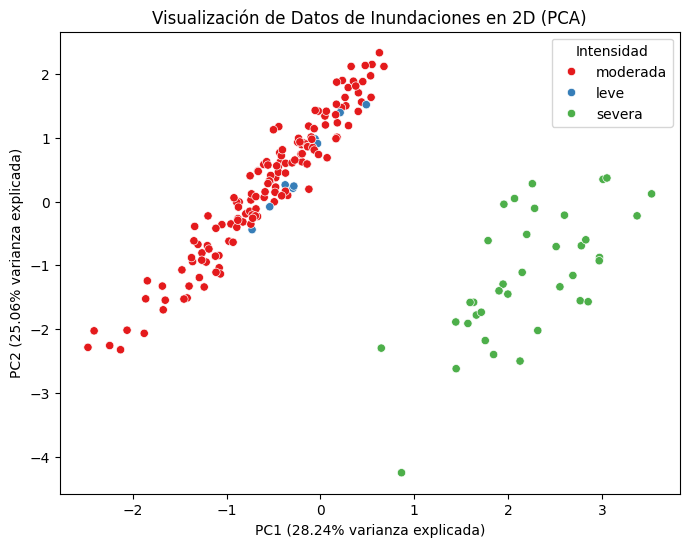

Varianza explicada por PC1: 28.24%
Varianza explicada por PC2: 25.06%
Varianza total explicada: 53.30%


In [65]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Suponiendo que 'bd_final' es el DataFrame con las variables numéricas estandarizadas y dummies
# Seleccionamos solo las columnas numéricas y dummies para PCA (excluimos 'registro_fecha' y 'clima')
columnas_pca = [col for col in bd_final.columns if col not in ['registro_fecha', 'clima']]

# Aplicar PCA para reducir a 2 componentes
pca = PCA(n_components=2)
X_pca = pca.fit_transform(bd_final[columnas_pca])

# Crear un DataFrame con los componentes principales y la variable 'intensidad' para colorear
df_pca = pd.DataFrame(X_pca, columns=['PC1', 'PC2'])
df_pca['intensidad'] = bd_inundacion['intensidad'].values  # Usamos la columna original de intensidad

# Visualizar los datos con un scatterplot
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df_pca, x='PC1', y='PC2', hue='intensidad', palette='Set1')
plt.title('Visualización de Datos de Inundaciones en 2D (PCA)')
plt.xlabel(f'PC1 ({pca.explained_variance_ratio_[0]:.2%} varianza explicada)')
plt.ylabel(f'PC2 ({pca.explained_variance_ratio_[1]:.2%} varianza explicada)')
plt.legend(title='Intensidad')
plt.show()

# Imprimir la varianza explicada por cada componente
print(f"Varianza explicada por PC1: {pca.explained_variance_ratio_[0]:.2%}")
print(f"Varianza explicada por PC2: {pca.explained_variance_ratio_[1]:.2%}")
print(f"Varianza total explicada: {sum(pca.explained_variance_ratio_):.2%}")

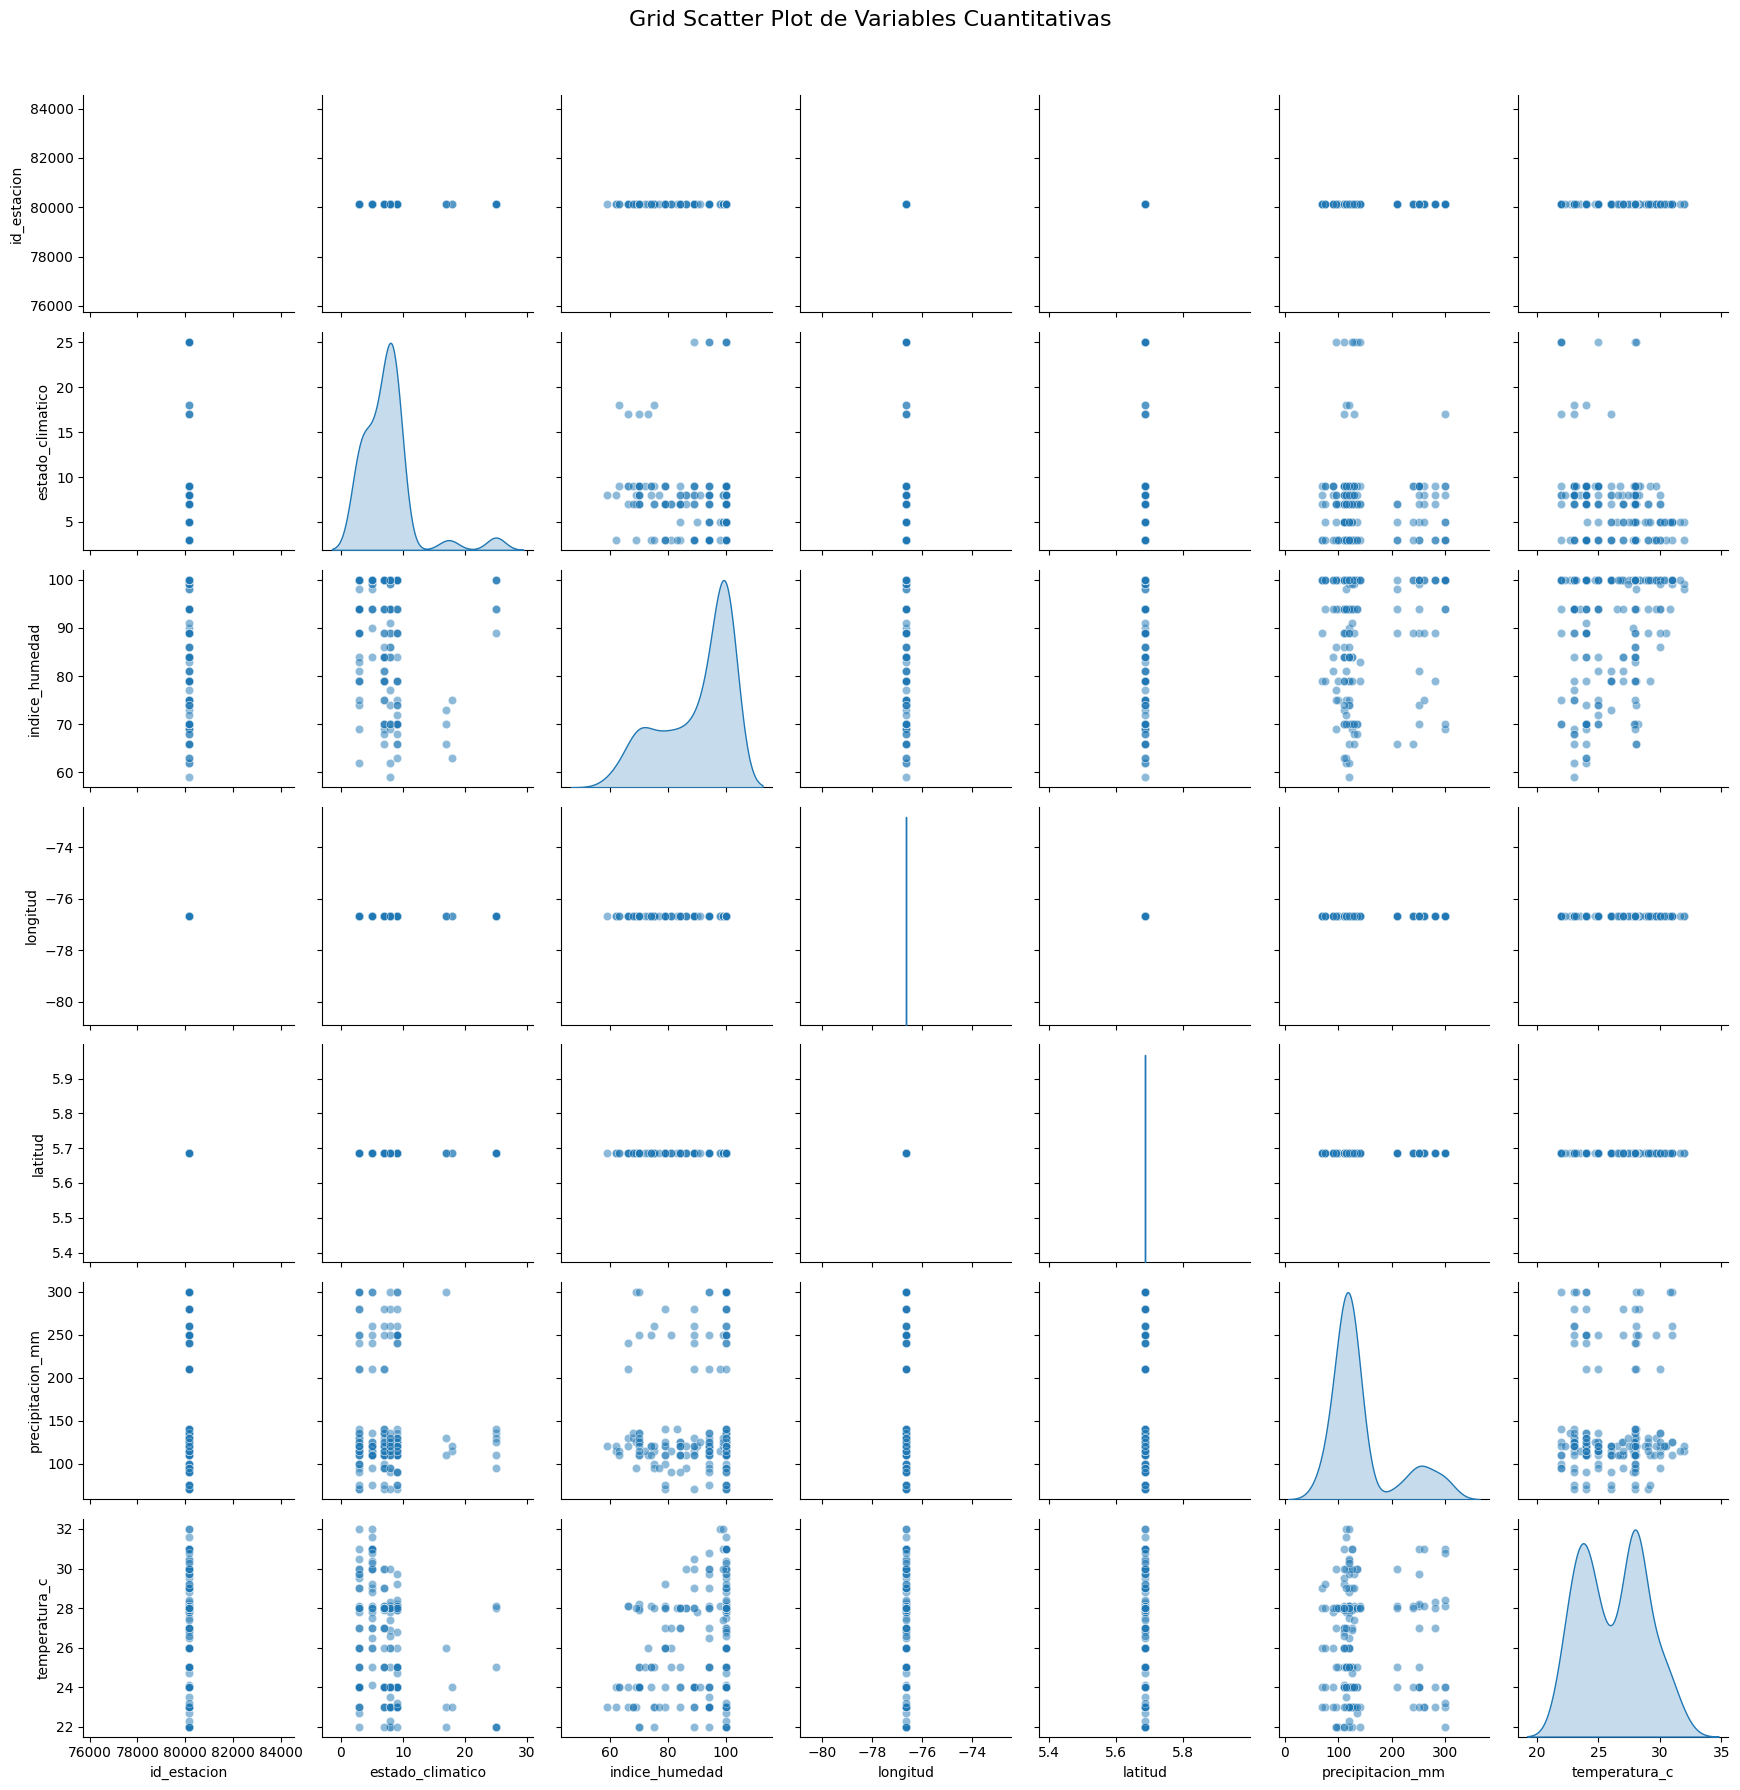

In [66]:
import seaborn as sns

import matplotlib.pyplot as plt

# Pairplot de variables cuantitativas
g = sns.pairplot(bd_numerico, diag_kind='kde', plot_kws={'alpha': 0.5})
g.fig.suptitle("Grid Scatter Plot de Variables Cuantitativas", y=1.02, fontsize=16)
plt.tight_layout()
plt.show()

<h1>Modelos supervisados</h1>

<h1> Regresion</h1>

In [82]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from xgboost import XGBRegressor

# Asumiendo que bd_final ya está definido como en el notebook original
# Paso 1: Dividir el conjunto de datos en entrenamiento (train) y prueba (test)
# Seleccionar variables cuantitativas normalizadas y dummies
columnas_numericas_normalizadas = ['estado_climatico', 'indice_humedad', 'temperatura_c']
columnas_dummies = [col for col in bd_final.columns if col.startswith(('intensidad_', 'altura_agua_', 'caudal_', 'duracion_lluvia_', 'nubosidad_'))]
X = bd_final[columnas_numericas_normalizadas + columnas_dummies]
y = bd_final['precipitacion_mm']

# Dividir en entrenamiento (80%) y prueba (20%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)






In [83]:
# Paso 2: Entrenar los modelos
# Lista para almacenar resultados
resultados = []

# --- Modelo KNN ---
knn = KNeighborsRegressor(n_neighbors=5, weights='distance')
knn.fit(X_train, y_train)

# --- Regresión Lineal ---
lr = LinearRegression()
lr.fit(X_train, y_train)

# --- Random Forest ---
rf = RandomForestRegressor(n_estimators=200, max_depth=10, random_state=42)
rf.fit(X_train, y_train)

# --- XGBoost ---
xgb = XGBRegressor(n_estimators=100, learning_rate=0.1, max_depth=5, random_state=42)
xgb.fit(X_train, y_train)


,objective,'reg:squarederror'
,base_score,None
,booster,None
,callbacks,None
,colsample_bylevel,None
,colsample_bynode,None
,colsample_bytree,None
,device,None
,early_stopping_rounds,None
,enable_categorical,False
,eval_metric,None


In [84]:
# Paso 3: Prueba y validación
# --- Predicciones y evaluación para KNN ---
y_pred_knn = knn.predict(X_test)
mse_knn = mean_squared_error(y_test, y_pred_knn)
r2_knn = max(r2_score(y_test, y_pred_knn), 0)  # Evitar R² negativo
resultados.append({'Modelo': 'KNN', 'MSE': mse_knn, 'R²': r2_knn})

print("Resultados para KNeighborsRegressor (n_neighbors=5):")
print(f"  Error Cuadrático Medio (MSE): {mse_knn:.4f}")
print(f"  R² Score: {r2_knn:.4f}")
print("\n")


Resultados para KNeighborsRegressor (n_neighbors=5):
  Error Cuadrático Medio (MSE): 0.0532
  R² Score: 0.9394




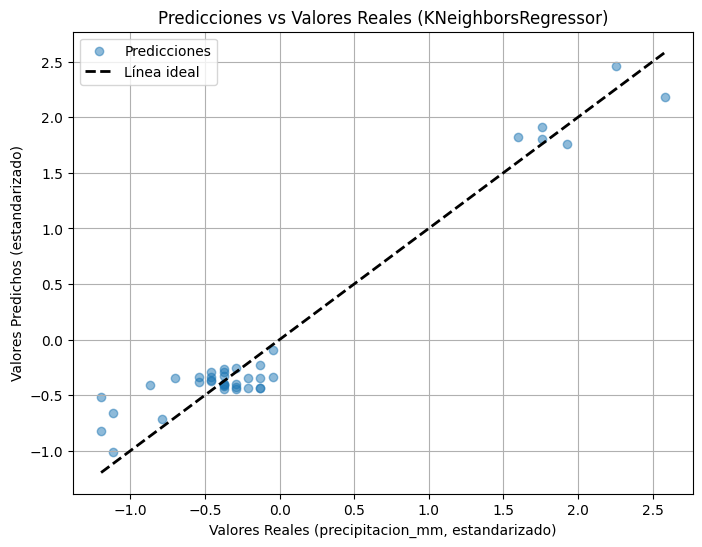

Resultados para Regresión Lineal:
  Error Cuadrático Medio (MSE): 0.0241
  R² Score: 0.9725




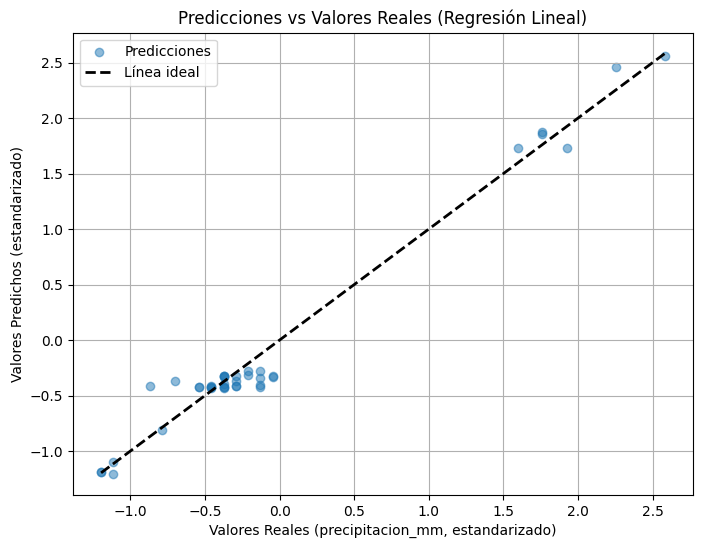

Resultados para Random Forest:
  Error Cuadrático Medio (MSE): 0.0225
  R² Score: 0.9743




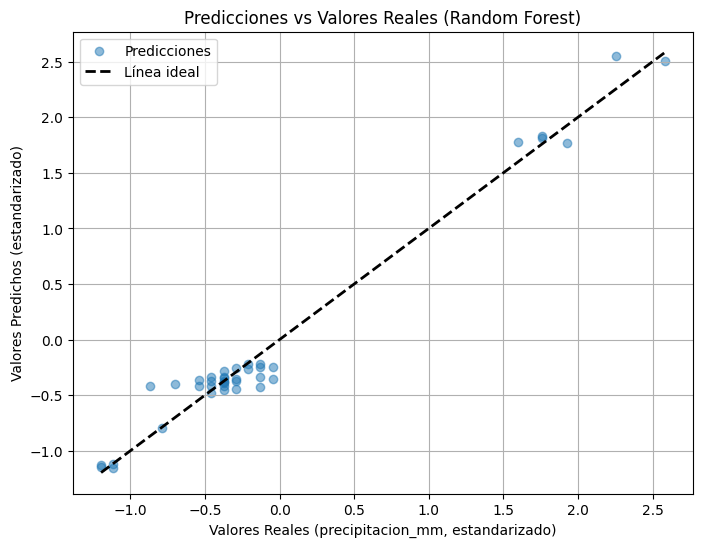

Resultados para XGBoost:
  Error Cuadrático Medio (MSE): 0.0237
  R² Score: 0.9730




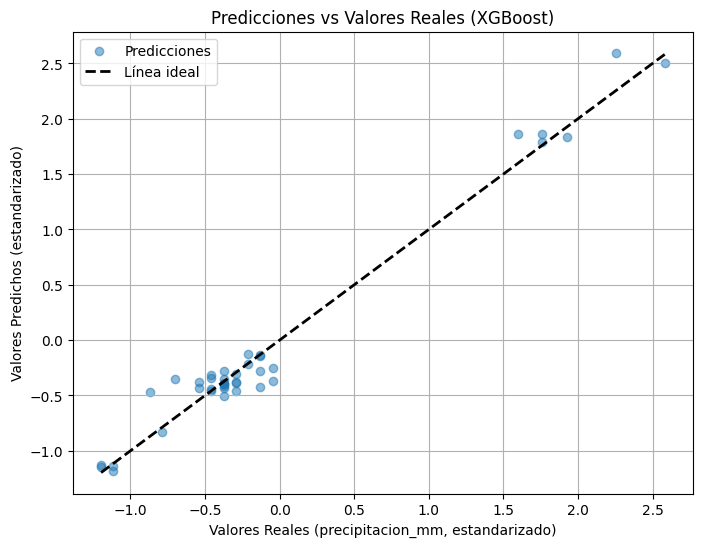

In [77]:
# Visualización para KNN
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred_knn, alpha=0.5, label='Predicciones')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2, label='Línea ideal')
plt.xlabel('Valores Reales (precipitacion_mm, estandarizado)')
plt.ylabel('Valores Predichos (estandarizado)')
plt.title('Predicciones vs Valores Reales (KNeighborsRegressor)')
plt.legend()
plt.grid(True)
plt.show()

# --- Predicciones y evaluación para Regresión Lineal ---
y_pred_lr = lr.predict(X_test)
mse_lr = mean_squared_error(y_test, y_pred_lr)
r2_lr = max(r2_score(y_test, y_pred_lr), 0)
resultados.append({'Modelo': 'Regresión Lineal', 'MSE': mse_lr, 'R²': r2_lr})

print("Resultados para Regresión Lineal:")
print(f"  Error Cuadrático Medio (MSE): {mse_lr:.4f}")
print(f"  R² Score: {r2_lr:.4f}")
print("\n")

# Visualización para Regresión Lineal
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred_lr, alpha=0.5, label='Predicciones')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2, label='Línea ideal')
plt.xlabel('Valores Reales (precipitacion_mm, estandarizado)')
plt.ylabel('Valores Predichos (estandarizado)')
plt.title('Predicciones vs Valores Reales (Regresión Lineal)')
plt.legend()
plt.grid(True)
plt.show()

# --- Predicciones y evaluación para Random Forest ---
y_pred_rf = rf.predict(X_test)
mse_rf = mean_squared_error(y_test, y_pred_rf)
r2_rf = max(r2_score(y_test, y_pred_rf), 0)
resultados.append({'Modelo': 'Random Forest', 'MSE': mse_rf, 'R²': r2_rf})

print("Resultados para Random Forest:")
print(f"  Error Cuadrático Medio (MSE): {mse_rf:.4f}")
print(f"  R² Score: {r2_rf:.4f}")
print("\n")

# Visualización para Random Forest
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred_rf, alpha=0.5, label='Predicciones')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2, label='Línea ideal')
plt.xlabel('Valores Reales (precipitacion_mm, estandarizado)')
plt.ylabel('Valores Predichos (estandarizado)')
plt.title('Predicciones vs Valores Reales (Random Forest)')
plt.legend()
plt.grid(True)
plt.show()

# --- Predicciones y evaluación para XGBoost ---
y_pred_xgb = xgb.predict(X_test)
mse_xgb = mean_squared_error(y_test, y_pred_xgb)
r2_xgb = max(r2_score(y_test, y_pred_xgb), 0)
resultados.append({'Modelo': 'XGBoost', 'MSE': mse_xgb, 'R²': r2_xgb})

print("Resultados para XGBoost:")
print(f"  Error Cuadrático Medio (MSE): {mse_xgb:.4f}")
print(f"  R² Score: {r2_xgb:.4f}")
print("\n")

# Visualización para XGBoost
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred_xgb, alpha=0.5, label='Predicciones')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2, label='Línea ideal')
plt.xlabel('Valores Reales (precipitacion_mm, estandarizado)')
plt.ylabel('Valores Predichos (estandarizado)')
plt.title('Predicciones vs Valores Reales (XGBoost)')
plt.legend()
plt.grid(True)
plt.show()

Resumen comparativo de modelos:
             Modelo       MSE        R²
0               KNN  0.053157  0.939362
1  Regresión Lineal  0.024070  0.972543
2     Random Forest  0.022488  0.974347
3           XGBoost  0.023696  0.972969
4  Regresión Lineal  0.024070  0.972543
5     Random Forest  0.022488  0.974347
6           XGBoost  0.023696  0.972969


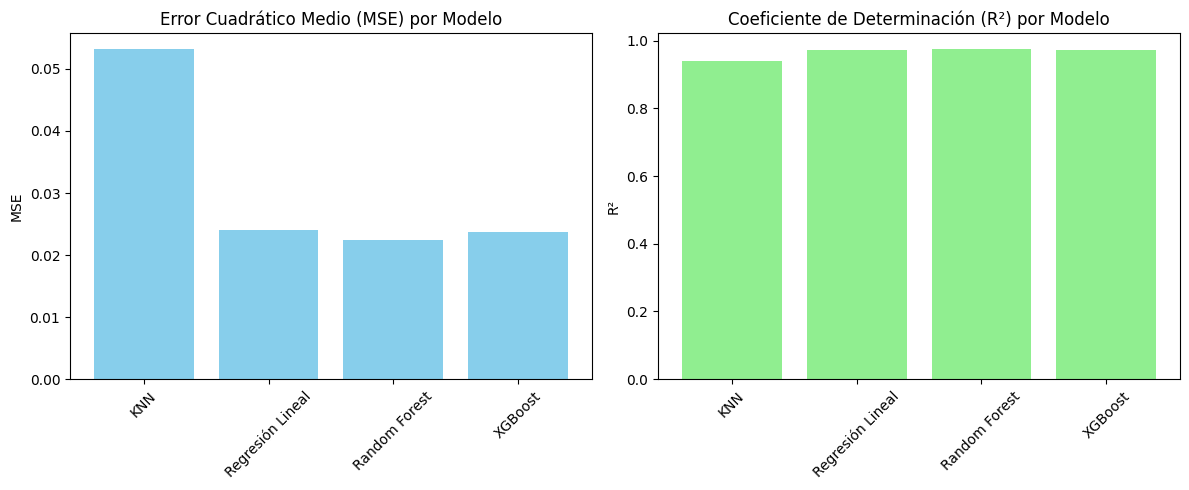

In [78]:


# Paso 4: Resumen comparativo de resultados
resultados_df = pd.DataFrame(resultados)
print("Resumen comparativo de modelos:")
print(resultados_df)

# Visualización comparativa de métricas
fig, ax = plt.subplots(1, 2, figsize=(12, 5))

# Gráfico de MSE
ax[0].bar(resultados_df['Modelo'], resultados_df['MSE'], color='skyblue')
ax[0].set_title('Error Cuadrático Medio (MSE) por Modelo')
ax[0].set_ylabel('MSE')
ax[0].tick_params(axis='x', rotation=45)

# Gráfico de R²
ax[1].bar(resultados_df['Modelo'], resultados_df['R²'], color='lightgreen')
ax[1].set_title('Coeficiente de Determinación (R²) por Modelo')
ax[1].set_ylabel('R²')
ax[1].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

<h1>Clasificación de datos</h1>